<a href="https://colab.research.google.com/github/rajsingh018/Segmentation_task/blob/main/glass_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm
import os
from google.colab.patches import cv2_imshow

# **Preprocessing Step**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("results-2.zip",outdir="/content")

  Using cached patool-2.2.0-py2.py3-none-any.whl (96 kB)


INFO patool: Extracting results-2.zip ...
INFO:patool:Extracting results-2.zip ...
INFO patool: running /usr/bin/7z x -o/content -- results-2.zip
INFO:patool:running /usr/bin/7z x -o/content -- results-2.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... results-2.zip extracted to `/content'.
INFO:patool:... results-2.zip extracted to `/content'.


'/content'

In [ ]:
import os
for i in os.listdir("/content/labels"):
  path5=os.path.join("/content/labels", i)
  file_name, file_ext = os.path.splitext(path5)
  new_path=file_name[:-1]+file_ext
  # print(new_path)
  os.rename(path5, new_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/labels'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name[:]

'/content/data/content/data/labels/train/BTR4515C2_img_03.'

In [ ]:
nam=[]
for i in tqdm(os.listdir(directory)):
  path1=os.path.join(directory, i)
  try:
    for j in os.listdir(path1):
      path2=os.path.join(path1, j)
      if os.path.isfile(path2):
        file_name, file_ext = os.path.splitext(path2)
        if file_ext=='.jpeg':
          os.rename(path2, f"/content/images/train/{j}")
  except:
    continue
      # file=os.path.join(directory, i,j,k)
      # nam.append(file)

NameError: name 'tqdm' is not defined

In [ ]:
print(len(os.listdir("/content/images/train")))

497


**Creating Masks**

In [ ]:
num=0
directory="/content/glasses/BUGSY WEB"
for i in tqdm(os.listdir(directory)):
  path1=os.path.join(directory, i)
  try:
    for j in os.listdir(path1):
      file=os.path.join(path1, j)
      if os.path.isfile(file):
        file_name, file_ext = os.path.splitext(file)
        if file_ext=='.jpeg':
          BGR = cv2.imread(file)
          HSV=cv2.cvtColor(BGR,cv2.COLOR_BGR2HSV)
          xx, yy=np.mgrid[:HSV[:,:,2].shape[0],:HSV[:,:,2].shape[1]]
          zz=HSV[:,:,2]

          values=HSV[:,:,2]
          image_light_mean_hsv=np.mean(values)
          image_light_mean_std=np.std(values)

          lower=0
          upper=image_light_mean_hsv
          upper_w_std=image_light_mean_hsv*image_light_mean_std/2
          mask_m=cv2.inRange(values, lower,  upper)
          mask_m=cv2.merge([mask_m, mask_m,mask_m])

          mask_d=cv2.inRange(values, lower,  upper_w_std)
          mask_d=cv2.merge([mask_d, mask_d,mask_d])
          cv2.imwrite(f'masked/{j}',mask_m)
          num+=1
  except:
      continue
      # file=os.path.join(directory, i,j,k)
      # nam.append(file)

100%|██████████| 63/63 [00:59<00:00,  1.07it/s]


**Changing Size of Masked Images**

In [ ]:
for i in os.listdir('/content/masked/content/masked'):
  path6=os.path.join('/content/masked/content/masked',i)
  img3=cv2.imread(path6)
  img3=cv2.resize(img3,(1024,1024))
  cv2.imwrite(f'/content/masks/{i}',img3)

FileNotFoundError: [Errno 2] No such file or directory: '/content/masked/content/masked'

In [ ]:
!pip install --upgrade ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.7/744.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

**Changing Masking images to numerical labels**

In [ ]:
import os

import cv2


input_dir = '/content/masks'
output_dir = '/content/label'

for j in os.listdir(input_dir):
    image_path = os.path.join(input_dir, j)
    # load the binary mask and get its contours
    mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    H, W = mask.shape
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # convert the contours to polygons
    polygons = []
    for cnt in contours:
        if cv2.contourArea(cnt) > 200:
            polygon = []
            for point in cnt:
                x, y = point[0]
                polygon.append(x / W)
                polygon.append(y / H)
            polygons.append(polygon)

    # print the polygons
    with open('{}.txt'.format(os.path.join(output_dir, j)[:-4]), 'w') as f:
        for polygon in polygons:
            for p_, p in enumerate(polygon):
                if p_ == len(polygon) - 1:
                    f.write('{}\n'.format(p))
                elif p_ == 0:
                    f.write('0 {} '.format(p))
                else:
                    f.write('{} '.format(p))

        f.close()

In [ ]:
for i in os.listdir("/content/images/train")[400:]:
  path3=os.path.join("/content/images/train", i)
  os.rename(path3, f"/content/images/val/{i}")

In [ ]:
for i in os.listdir("/content/labels"):
  path3=os.path.join("/content/labels", i)
  os.rename(path3, f"/content/data/labels/val/{i}")

In [ ]:
img1=cv2.imread('/content/BTR4531C3_img_01.jpeg')
img2=cv2.imread('/content/E7070C1_img_01_cleanup.jpeg')
img3=cv2.imread('/content/BTR4531C3_img_01.jpeg')
img1=cv2.resize(img1,(1024,1024))
img2=cv2.resize(img2,(1024,1024))
img3=cv2.resize(img3,(1024,1024))
final=cv2.addWeighted(img1,0.7,img2,0.3,5)
cv2_imshow(final)
cv2_imshow(img3)

**Data Interpolation**

In [ ]:
for i in os.listdir('/content/data2/content/data/images/val'):
  path7=os.path.join('/content/data2/content/data/images/val',i)
  img1=cv2.imread(path7)
  img2=cv2.imread('/content/E7070C1_img_01_cleanup.jpeg')
  img1=cv2.resize(img1,(1024,1024))
  img2=cv2.resize(img2,(1024,1024))
  final=cv2.addWeighted(img1,0.7,img2,0.3,5)
  cv2.imwrite(f'/content/data/images/val/{i}',final)

# **Training**

In [ ]:
import os

from ultralytics import YOLO


model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

model.train(data='/content/config.yaml', epochs=25, imgsz=640)


100%|██████████| 6.73M/6.73M [00:00<00:00, 97.9MB/s]


Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/config.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 118MB/s]


AMP: checks passed ✅


train: Scanning /content/content/data/labels/train... 322 images, 78 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 214.99it/s]


train: New cache created: /content/content/data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/content/data/labels/val... 19 images, 78 backgrounds, 0 corrupt: 100%|██████████| 97/97 [00:00<00:00, 266.39it/s]

val: New cache created: /content/content/data/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.97G     0.7287       2.26      2.279      1.138         34        640: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all         97         22   0.000653      0.864      0.158        0.1   0.000619      0.818      0.151     0.0929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/25       2.9G     0.5806     0.7424      1.334      1.003         33        640: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


                   all         97         22      0.187      0.727      0.206      0.148      0.187      0.727      0.206      0.103

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.74G     0.5602     0.6949      1.361     0.9852         30        640: 100%|██████████| 25/25 [00:10<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


                   all         97         22      0.199        0.5      0.202      0.104      0.199        0.5      0.199      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.86G      0.629     0.8618      1.213      1.023         25        640: 100%|██████████| 25/25 [00:11<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]


                   all         97         22      0.198      0.273      0.115     0.0577      0.174      0.227      0.088       0.03

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.75G     0.5881      0.647      1.077     0.9901         32        640: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]


                   all         97         22      0.129      0.182     0.0675     0.0218     0.0802     0.0909     0.0416    0.00809

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.78G     0.5748      0.675     0.9524     0.9773         33        640: 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]


                   all         97         22      0.167      0.273     0.0806     0.0387     0.0592     0.0909     0.0182    0.00399

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.85G     0.5461     0.5566     0.9375     0.9729         34        640: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]


                   all         97         22      0.171      0.818      0.221      0.178      0.148      0.682      0.193      0.117

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.76G     0.5742     0.6168     0.9916     0.9962         29        640: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all         97         22      0.181      0.682      0.195       0.14      0.181      0.682      0.195      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.84G      0.515       0.57     0.9014      0.956         28        640: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]


                   all         97         22       0.22      0.773       0.21      0.154       0.22      0.773       0.21      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.77G     0.4929     0.4835     0.7928     0.9496         32        640: 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]


                   all         97         22      0.187      0.818       0.18      0.153      0.187      0.818      0.182      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.89G       0.46     0.4869     0.7452     0.9265         33        640: 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


                   all         97         22     0.0928      0.636     0.0843     0.0299     0.0213      0.136     0.0044   0.000538

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.89G     0.4838     0.5565     0.7917     0.9443         33        640: 100%|██████████| 25/25 [00:11<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


                   all         97         22      0.201      0.818      0.293      0.261      0.201      0.818      0.293      0.284

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.76G     0.4502     0.4577     0.7242     0.9224         32        640: 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all         97         22      0.203      0.909      0.199       0.18      0.203      0.909      0.199      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.79G     0.4492     0.4967      0.702     0.9234         32        640: 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all         97         22      0.206      0.864      0.204      0.188      0.206      0.864      0.204      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.76G     0.4167     0.5195     0.6588     0.9164         42        640: 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all         97         22      0.205      0.818      0.193      0.138      0.154       0.59      0.116     0.0486


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.88G     0.3865     0.3742     0.7785     0.9484         13        640: 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all         97         22        0.2      0.818      0.227      0.181        0.2      0.818      0.227      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.75G     0.3526     0.3516     0.6671     0.9252         12        640: 100%|██████████| 25/25 [00:10<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all         97         22      0.201      0.909      0.195      0.189      0.201      0.909      0.195      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.75G     0.3469     0.3224     0.6671     0.9028         13        640: 100%|██████████| 25/25 [00:10<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         97         22      0.205      0.864      0.221      0.158      0.188      0.773      0.191      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.75G     0.3417     0.2979     0.6635      0.899         13        640: 100%|██████████| 25/25 [00:10<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all         97         22      0.193      0.773      0.237      0.209      0.193      0.773      0.236      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.75G     0.3177     0.2792     0.6341     0.8903         13        640: 100%|██████████| 25/25 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all         97         22      0.202      0.909      0.231       0.21      0.202      0.909      0.231      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.75G     0.3058     0.3508     0.6139     0.8756         13        640: 100%|██████████| 25/25 [00:10<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


                   all         97         22      0.201      0.909      0.207      0.195      0.201      0.909      0.207      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.75G     0.2836      0.297     0.5763      0.866         14        640: 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all         97         22      0.201      0.909      0.198      0.183      0.201      0.909      0.198      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.75G     0.2719     0.3015     0.5827     0.8604         17        640: 100%|██████████| 25/25 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         97         22        0.2      0.909      0.201       0.19        0.2      0.909      0.201      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.75G     0.2504     0.2859     0.5622     0.8472         15        640: 100%|██████████| 25/25 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all         97         22      0.201      0.909      0.192      0.177      0.201      0.909      0.192       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.74G     0.2544     0.2874     0.5511     0.8503         13        640: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all         97         22      0.201      0.909      0.196      0.187      0.201      0.909      0.196      0.188



25 epochs completed in 0.104 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]


                   all         97         22      0.202      0.818      0.293      0.256      0.202      0.818      0.293      0.283
Speed: 0.4ms preprocess, 4.8ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f19c3990c40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

# **Prediction**

  0%|          | 0/80 [00:00<?, ?it/s]


0: 448x640 (no detections), 27.4ms
Speed: 4.6ms preprocess, 27.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


  1%|▏         | 1/80 [00:00<00:59,  1.33it/s]


0: 448x640 1 glasses, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


  2%|▎         | 2/80 [00:03<02:47,  2.14s/it]


0: 448x640 1 glasses, 10.1ms
Speed: 3.6ms preprocess, 10.1ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


  4%|▍         | 3/80 [00:07<03:25,  2.67s/it]


0: 448x640 1 glasses, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


  5%|▌         | 4/80 [00:10<03:28,  2.75s/it]


0: 448x640 1 glasses, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


  6%|▋         | 5/80 [00:12<03:16,  2.62s/it]


0: 448x640 (no detections), 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


  8%|▊         | 6/80 [00:12<02:16,  1.84s/it]


0: 448x640 (no detections), 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


  9%|▉         | 7/80 [00:13<01:38,  1.35s/it]


0: 448x640 (no detections), 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


 10%|█         | 8/80 [00:13<01:14,  1.03s/it]


0: 448x640 (no detections), 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 11%|█▏        | 9/80 [00:13<00:58,  1.21it/s]


0: 448x640 (no detections), 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


 12%|█▎        | 10/80 [00:14<00:47,  1.48it/s]


0: 448x640 (no detections), 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 14%|█▍        | 11/80 [00:14<00:39,  1.74it/s]


0: 448x640 (no detections), 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 15%|█▌        | 12/80 [00:14<00:34,  1.97it/s]


0: 448x640 (no detections), 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 16%|█▋        | 13/80 [00:15<00:30,  2.18it/s]


0: 448x640 (no detections), 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 18%|█▊        | 14/80 [00:15<00:27,  2.37it/s]


0: 448x640 (no detections), 8.3ms
Speed: 2.5ms preprocess, 8.3ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 19%|█▉        | 15/80 [00:15<00:25,  2.50it/s]


0: 448x640 (no detections), 10.2ms
Speed: 3.6ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


 20%|██        | 16/80 [00:16<00:26,  2.38it/s]


0: 448x640 (no detections), 9.7ms
Speed: 3.4ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


 21%|██▏       | 17/80 [00:16<00:28,  2.24it/s]


0: 448x640 1 glasses, 16.9ms
Speed: 3.4ms preprocess, 16.9ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


 22%|██▎       | 18/80 [00:20<01:22,  1.33s/it]


0: 448x640 (no detections), 8.8ms
Speed: 2.7ms preprocess, 8.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 24%|██▍       | 19/80 [00:20<01:03,  1.03s/it]


0: 448x640 1 glasses, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


 25%|██▌       | 20/80 [00:22<01:26,  1.44s/it]


0: 448x640 (no detections), 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 26%|██▋       | 21/80 [00:23<01:05,  1.11s/it]


0: 448x640 1 glasses, 8.2ms
Speed: 2.7ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


 28%|██▊       | 22/80 [00:25<01:26,  1.48s/it]


0: 448x640 (no detections), 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 29%|██▉       | 23/80 [00:26<01:04,  1.14s/it]


0: 448x640 (no detections), 8.7ms
Speed: 2.6ms preprocess, 8.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 30%|███       | 24/80 [00:26<00:50,  1.11it/s]


0: 448x640 (no detections), 11.1ms
Speed: 2.6ms preprocess, 11.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 31%|███▏      | 25/80 [00:26<00:40,  1.36it/s]


0: 448x640 (no detections), 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


 32%|███▎      | 26/80 [00:27<00:33,  1.61it/s]


0: 448x640 (no detections), 9.0ms
Speed: 2.8ms preprocess, 9.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 34%|███▍      | 27/80 [00:27<00:28,  1.85it/s]


0: 448x640 1 glasses, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


 35%|███▌      | 28/80 [00:30<01:04,  1.25s/it]


0: 448x640 (no detections), 9.5ms
Speed: 3.4ms preprocess, 9.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 36%|███▋      | 29/80 [00:31<00:56,  1.10s/it]


0: 448x640 2 glassess, 14.5ms
Speed: 3.4ms preprocess, 14.5ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


 38%|███▊      | 30/80 [00:33<01:21,  1.63s/it]


0: 448x640 1 glasses, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


 39%|███▉      | 31/80 [00:36<01:30,  1.84s/it]


0: 448x640 1 glasses, 10.7ms
Speed: 2.6ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


 40%|████      | 32/80 [00:38<01:36,  2.01s/it]


0: 448x640 1 glasses, 8.5ms
Speed: 2.9ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


 41%|████▏     | 33/80 [00:41<01:39,  2.11s/it]


0: 448x640 1 glasses, 8.7ms
Speed: 2.5ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


 42%|████▎     | 34/80 [00:44<01:53,  2.46s/it]


0: 448x640 2 glassess, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


 44%|████▍     | 35/80 [00:47<01:56,  2.58s/it]


0: 448x640 (no detections), 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 45%|████▌     | 36/80 [00:47<01:23,  1.91s/it]


0: 448x640 (no detections), 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 46%|████▋     | 37/80 [00:47<01:01,  1.44s/it]


0: 448x640 (no detections), 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 48%|████▊     | 38/80 [00:48<00:46,  1.11s/it]


0: 448x640 (no detections), 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 49%|████▉     | 39/80 [00:48<00:36,  1.14it/s]


0: 448x640 (no detections), 9.0ms
Speed: 2.8ms preprocess, 9.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 50%|█████     | 40/80 [00:48<00:29,  1.38it/s]


0: 448x640 2 glassess, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)


 51%|█████▏    | 41/80 [00:51<00:49,  1.27s/it]


0: 448x640 (no detections), 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 52%|█████▎    | 42/80 [00:52<00:40,  1.06s/it]


0: 448x640 1 glasses, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


 54%|█████▍    | 43/80 [00:54<00:53,  1.45s/it]


0: 448x640 (no detections), 9.6ms
Speed: 2.7ms preprocess, 9.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 55%|█████▌    | 44/80 [00:54<00:40,  1.12s/it]


0: 448x640 1 glasses, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


 56%|█████▋    | 45/80 [00:58<01:04,  1.86s/it]


0: 448x640 2 glassess, 8.7ms
Speed: 3.4ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


 57%|█████▊    | 46/80 [01:00<01:11,  2.09s/it]


0: 448x640 1 glasses, 12.6ms
Speed: 2.9ms preprocess, 12.6ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


 59%|█████▉    | 47/80 [01:03<01:12,  2.20s/it]


0: 448x640 1 glasses, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


 60%|██████    | 48/80 [01:07<01:28,  2.78s/it]


0: 448x640 1 glasses, 10.5ms
Speed: 3.9ms preprocess, 10.5ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


<ipython-input-12-23d83309e203>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,15))
 61%|██████▏   | 49/80 [01:12<01:48,  3.49s/it]


0: 448x640 (no detections), 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 62%|██████▎   | 50/80 [01:15<01:34,  3.15s/it]


0: 448x640 (no detections), 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 64%|██████▍   | 51/80 [01:17<01:26,  2.98s/it]


0: 448x640 (no detections), 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 65%|██████▌   | 52/80 [01:19<01:15,  2.70s/it]


0: 448x640 (no detections), 9.9ms
Speed: 3.4ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


 66%|██████▋   | 53/80 [01:22<01:10,  2.62s/it]


0: 448x640 (no detections), 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 68%|██████▊   | 54/80 [01:24<01:09,  2.68s/it]


0: 448x640 1 glasses, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


 69%|██████▉   | 55/80 [01:29<01:19,  3.20s/it]


0: 448x640 2 glassess, 8.2ms
Speed: 2.7ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


 70%|███████   | 56/80 [01:35<01:36,  4.00s/it]


0: 448x640 1 glasses, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


 71%|███████▏  | 57/80 [01:40<01:40,  4.35s/it]


0: 448x640 3 glassess, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


 72%|███████▎  | 58/80 [01:44<01:36,  4.38s/it]


0: 448x640 1 glasses, 13.5ms
Speed: 3.3ms preprocess, 13.5ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


 74%|███████▍  | 59/80 [01:50<01:40,  4.77s/it]


0: 448x640 1 glasses, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


 75%|███████▌  | 60/80 [01:54<01:28,  4.41s/it]


0: 448x640 (no detections), 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 76%|███████▋  | 61/80 [01:57<01:19,  4.17s/it]


0: 448x640 (no detections), 14.7ms
Speed: 3.4ms preprocess, 14.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


 78%|███████▊  | 62/80 [02:00<01:07,  3.74s/it]


0: 448x640 (no detections), 12.8ms
Speed: 2.8ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


 79%|███████▉  | 63/80 [02:02<00:54,  3.23s/it]


0: 448x640 2 glassess, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


 80%|████████  | 64/80 [02:07<00:59,  3.74s/it]


0: 448x640 (no detections), 12.3ms
Speed: 4.1ms preprocess, 12.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 81%|████████▏ | 65/80 [02:09<00:50,  3.35s/it]


0: 448x640 (no detections), 14.4ms
Speed: 3.5ms preprocess, 14.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


 82%|████████▎ | 66/80 [02:11<00:40,  2.86s/it]


0: 448x640 (no detections), 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 84%|████████▍ | 67/80 [02:14<00:36,  2.79s/it]


0: 448x640 (no detections), 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 85%|████████▌ | 68/80 [02:16<00:33,  2.81s/it]


0: 448x640 (no detections), 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 86%|████████▋ | 69/80 [02:18<00:28,  2.55s/it]


0: 448x640 1 glasses, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


 88%|████████▊ | 70/80 [02:23<00:30,  3.05s/it]


0: 448x640 (no detections), 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 89%|████████▉ | 71/80 [02:27<00:30,  3.42s/it]


0: 448x640 (no detections), 16.8ms
Speed: 2.9ms preprocess, 16.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


 90%|█████████ | 72/80 [02:31<00:28,  3.52s/it]


0: 448x640 (no detections), 10.2ms
Speed: 3.5ms preprocess, 10.2ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 91%|█████████▏| 73/80 [02:33<00:21,  3.08s/it]


0: 448x640 (no detections), 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 92%|█████████▎| 74/80 [02:34<00:15,  2.62s/it]


0: 448x640 (no detections), 14.6ms
Speed: 3.5ms preprocess, 14.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


 94%|█████████▍| 75/80 [02:37<00:12,  2.52s/it]


0: 448x640 (no detections), 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


 95%|█████████▌| 76/80 [02:39<00:10,  2.53s/it]


0: 448x640 (no detections), 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 96%|█████████▋| 77/80 [02:41<00:07,  2.45s/it]


0: 448x640 (no detections), 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


 98%|█████████▊| 78/80 [02:44<00:05,  2.50s/it]


0: 448x640 (no detections), 10.2ms
Speed: 3.6ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


 99%|█████████▉| 79/80 [02:47<00:02,  2.71s/it]


0: 448x640 1 glasses, 14.4ms
Speed: 3.5ms preprocess, 14.4ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


100%|██████████| 80/80 [02:51<00:00,  2.14s/it]


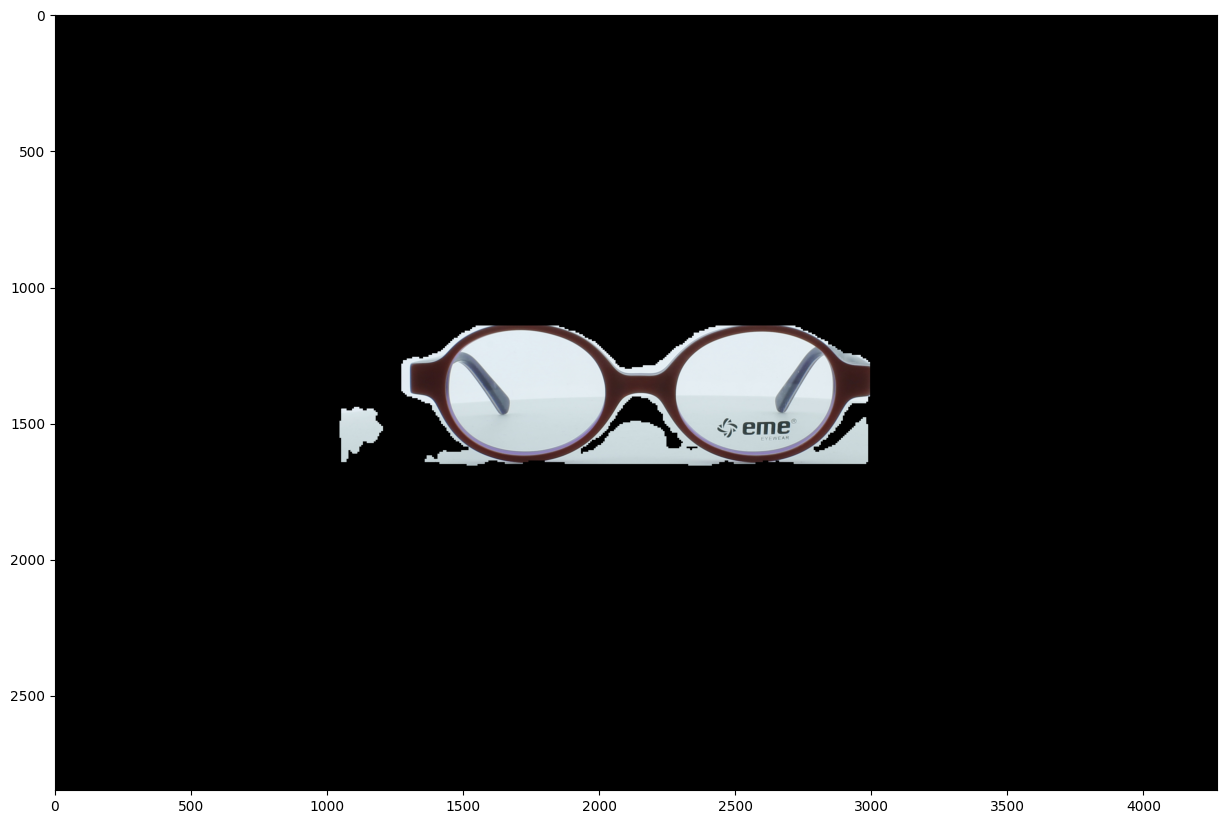

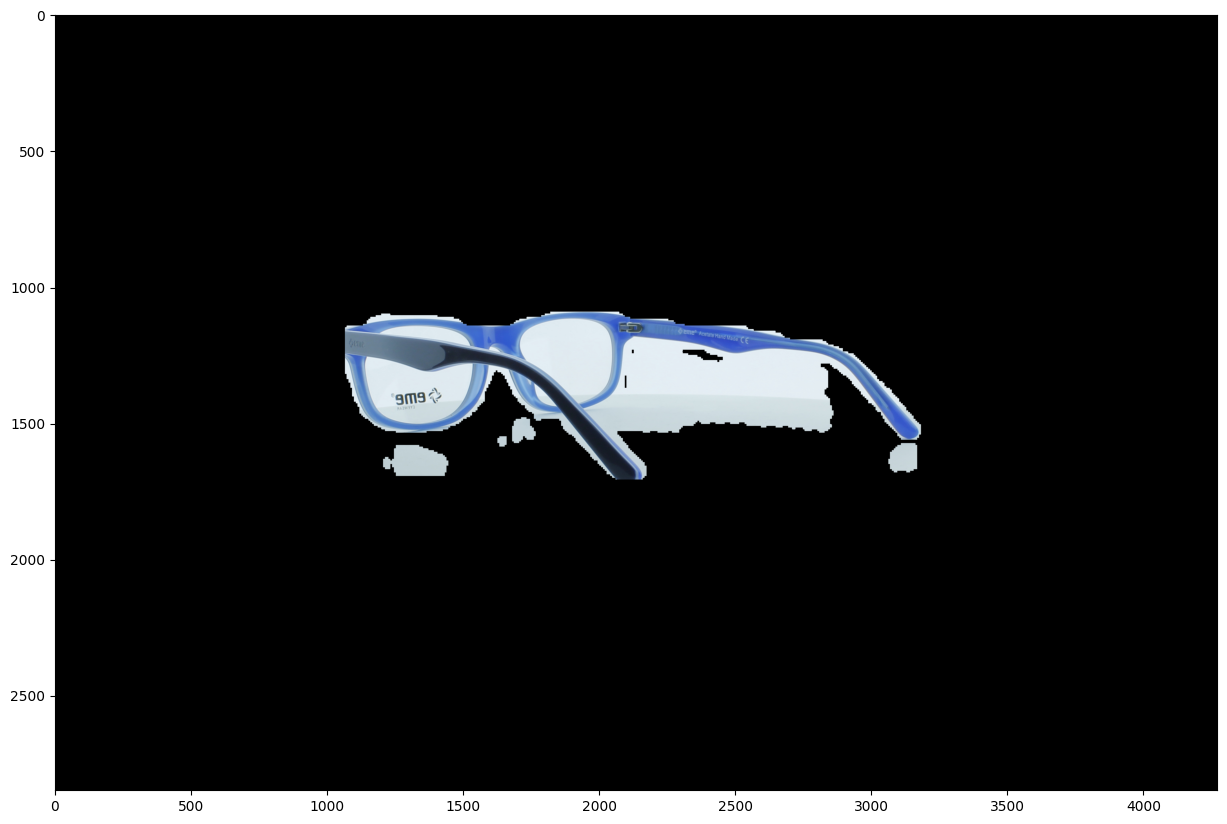

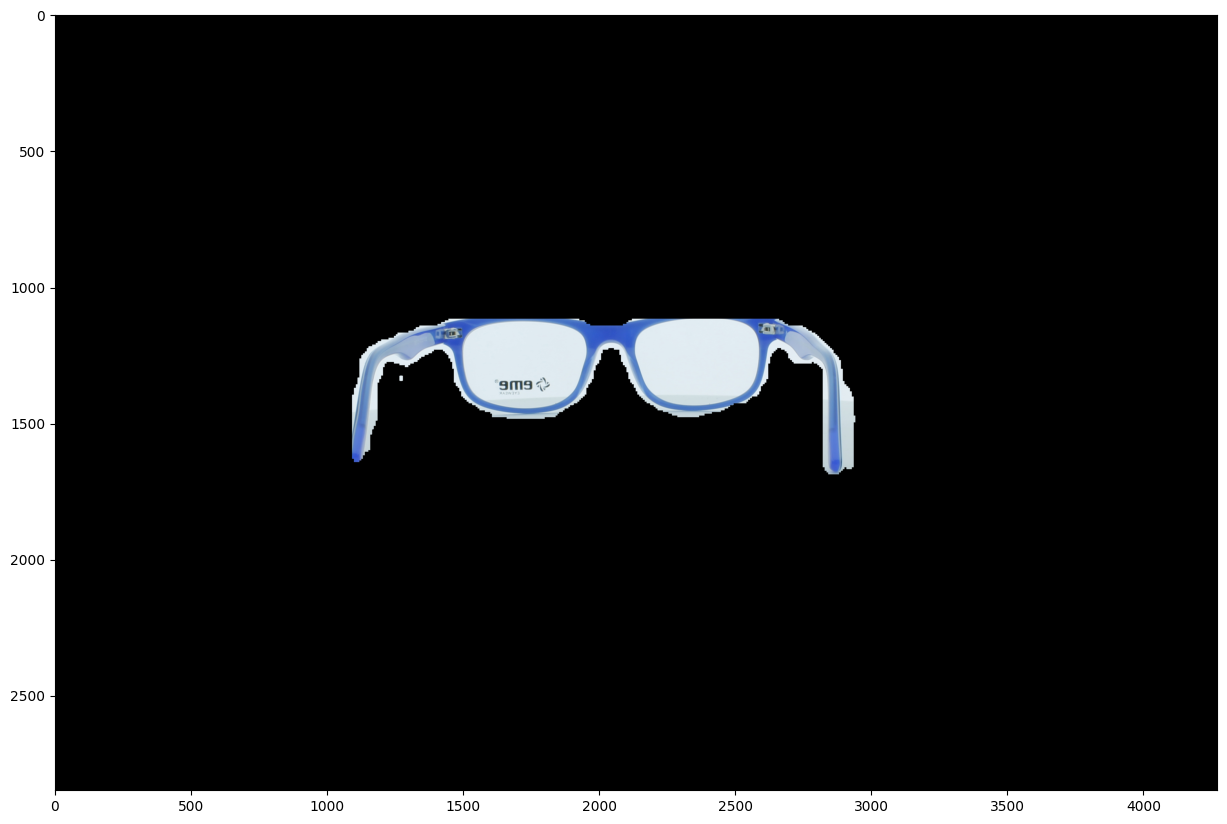

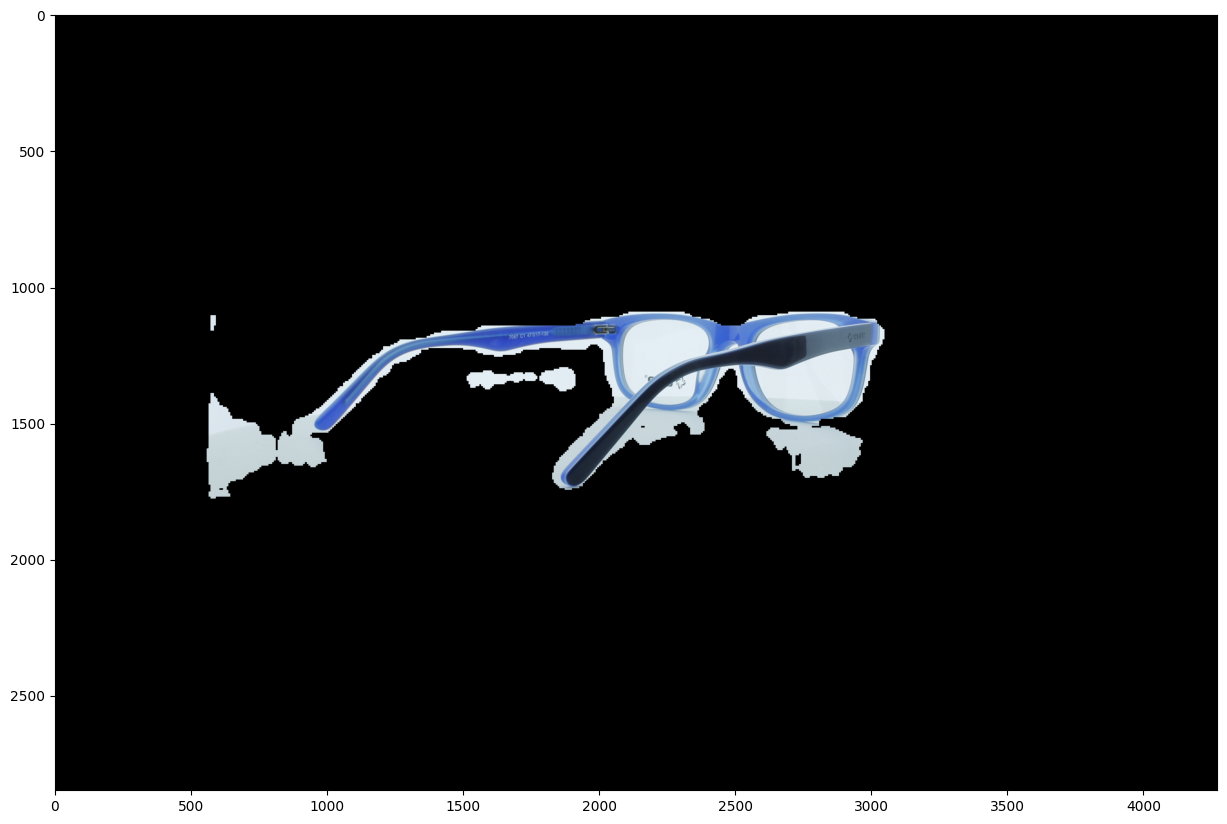

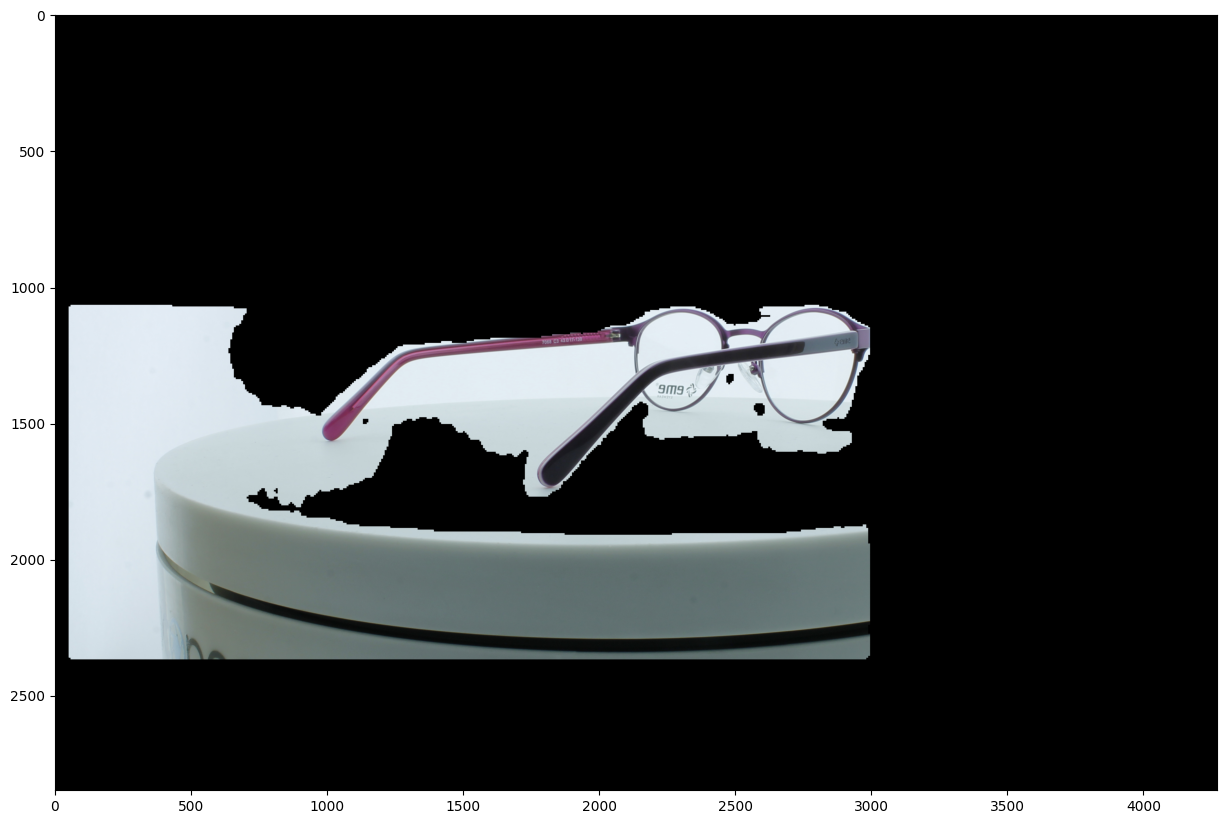

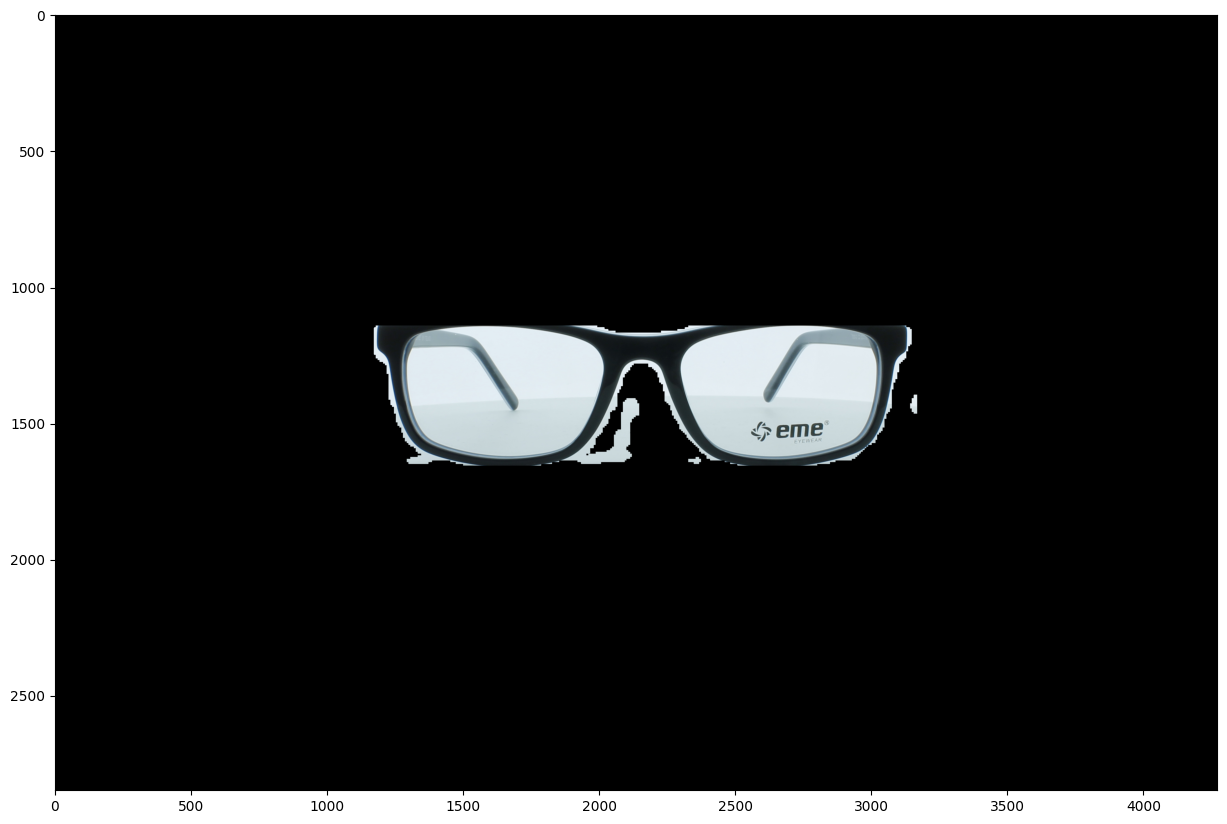

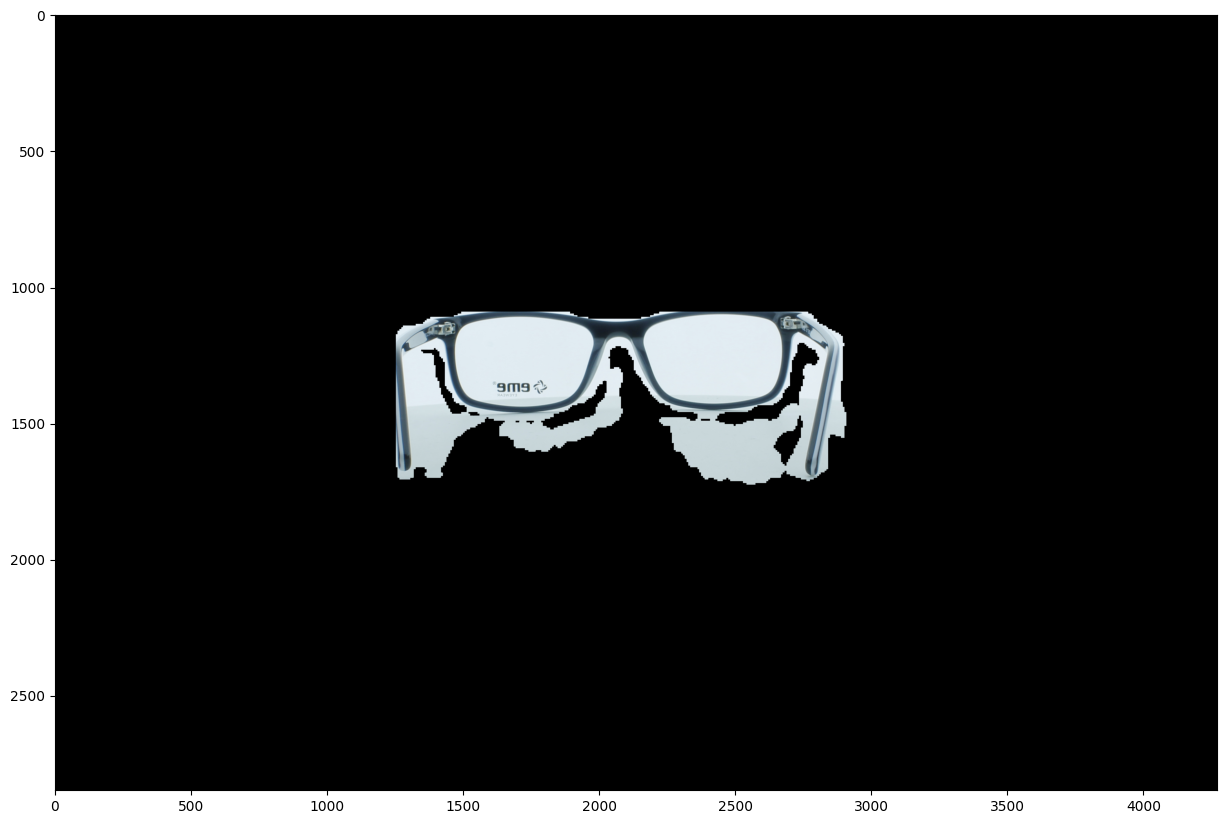

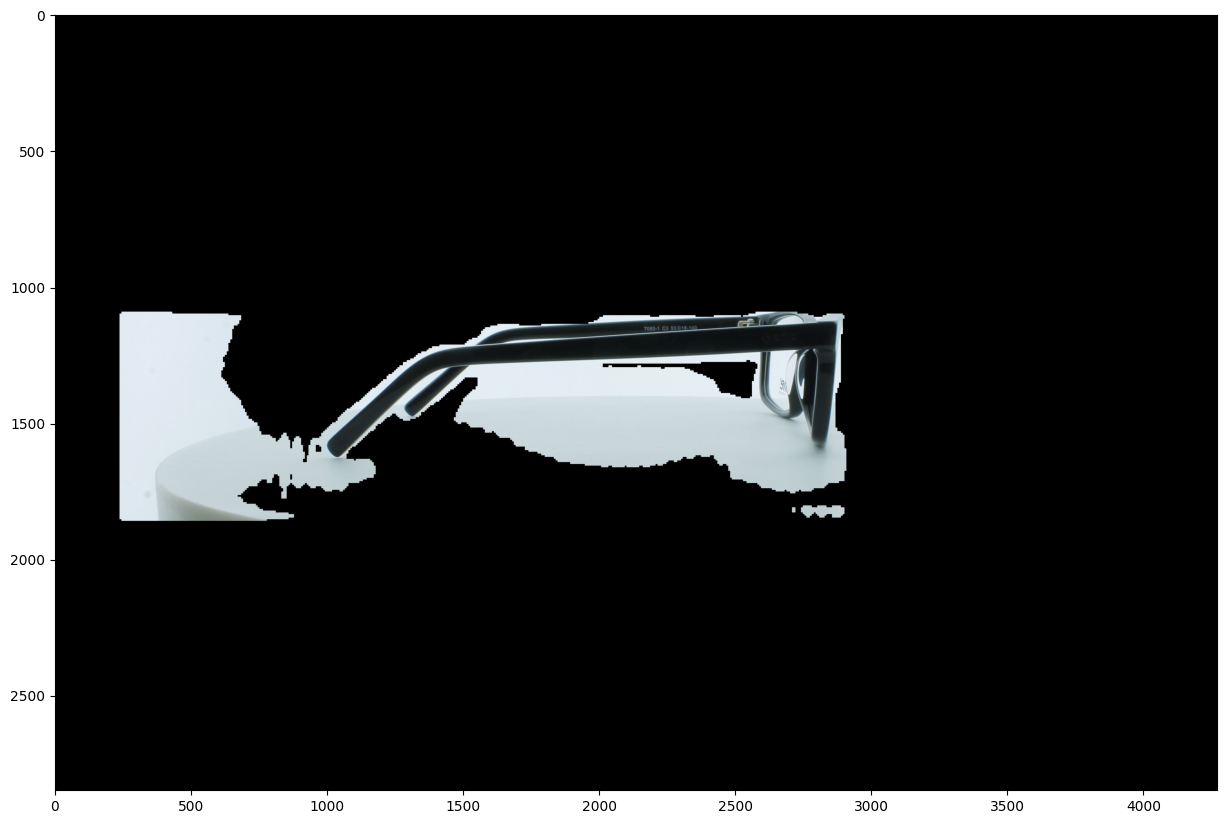

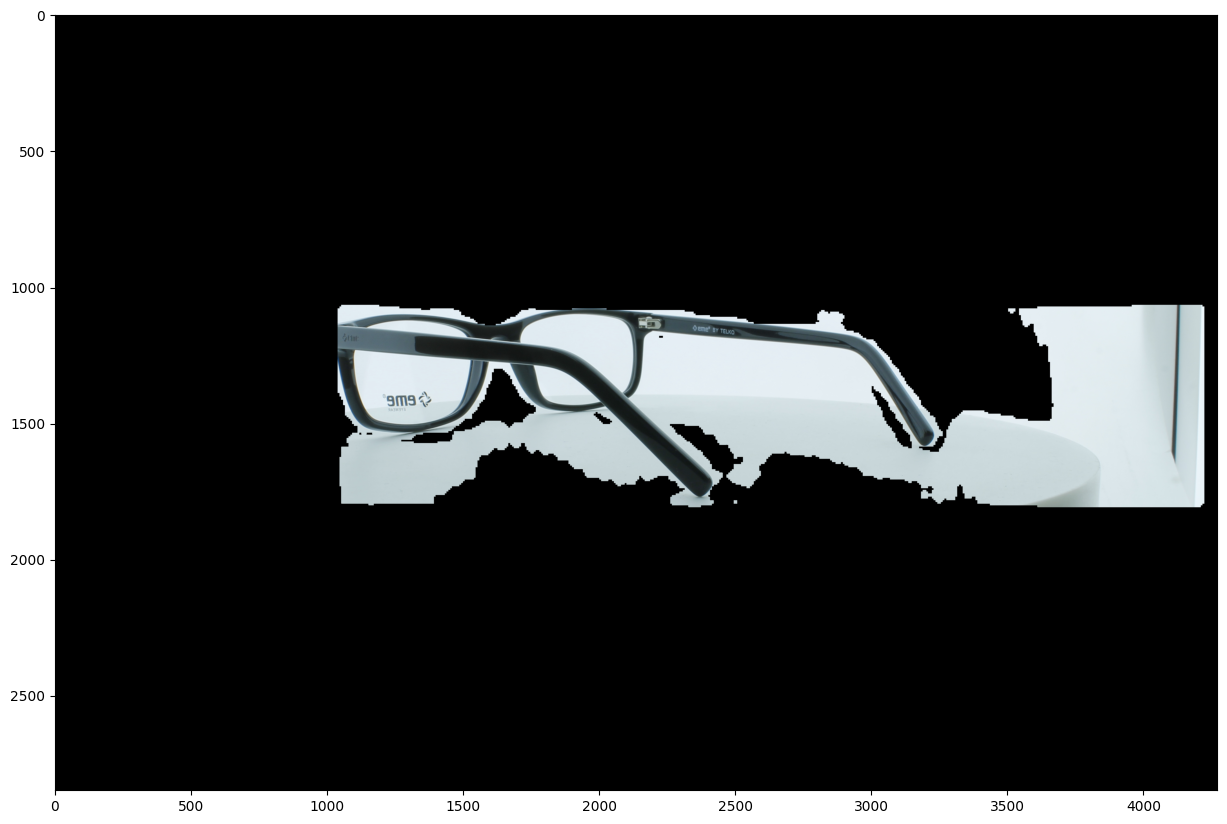

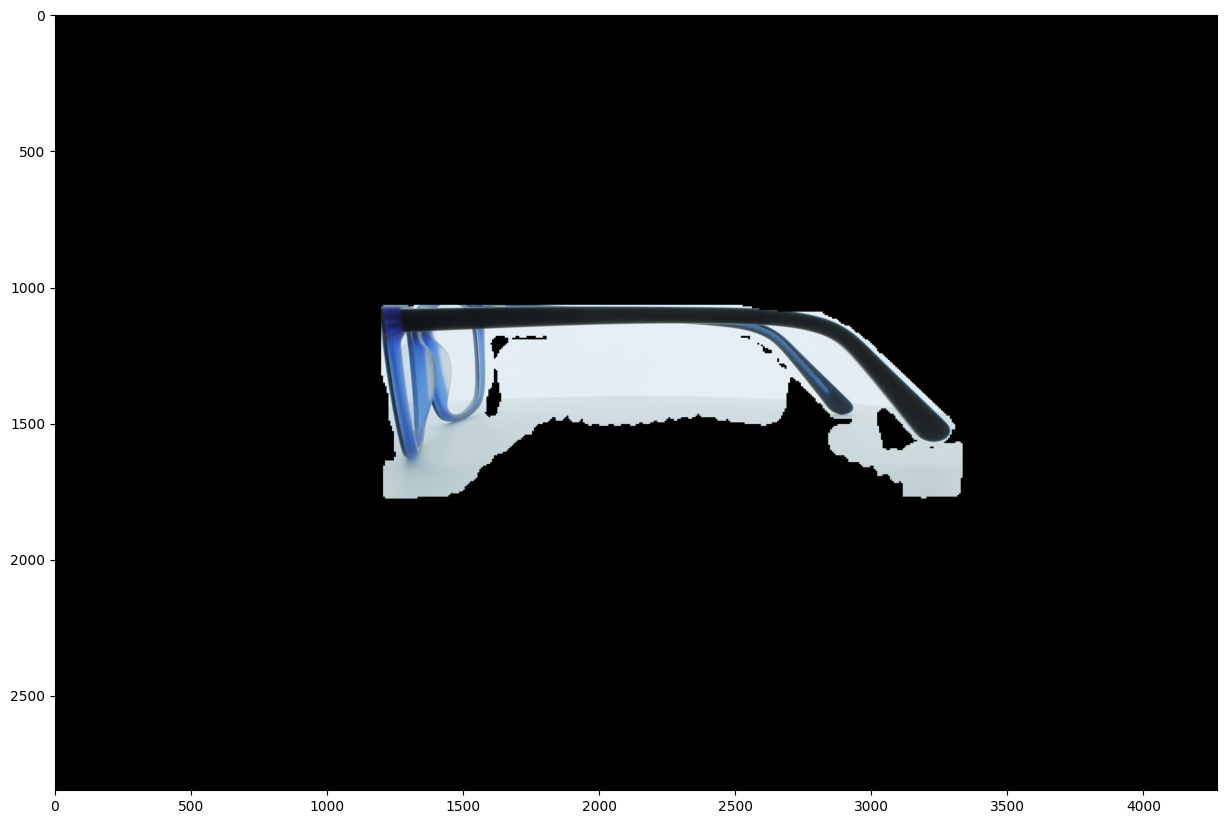

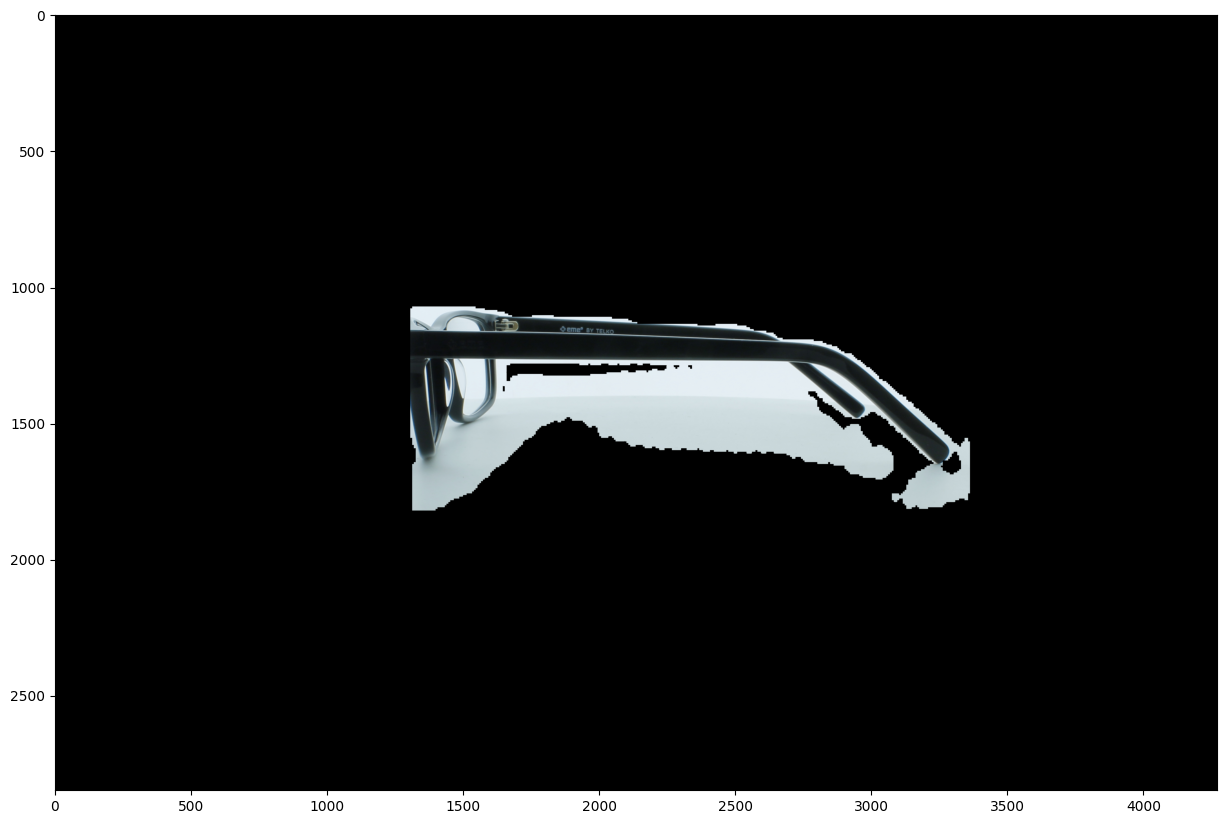

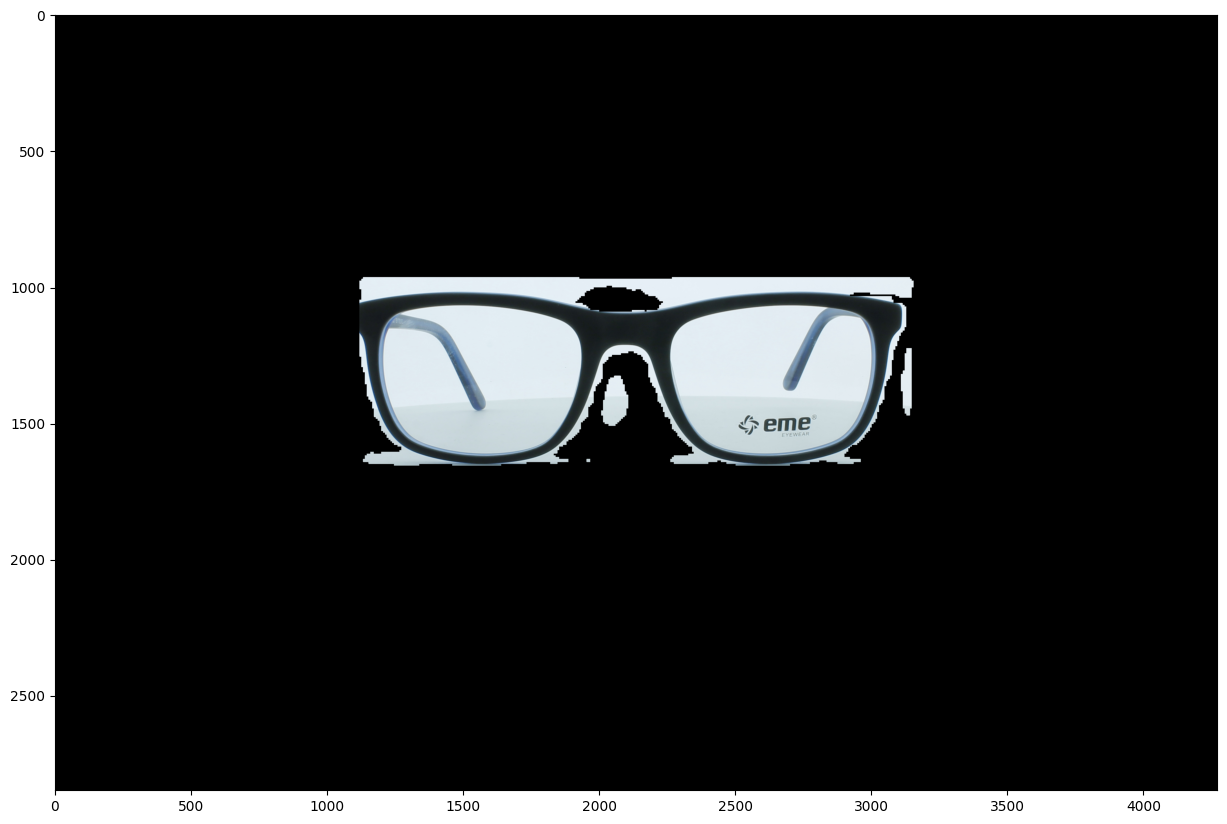

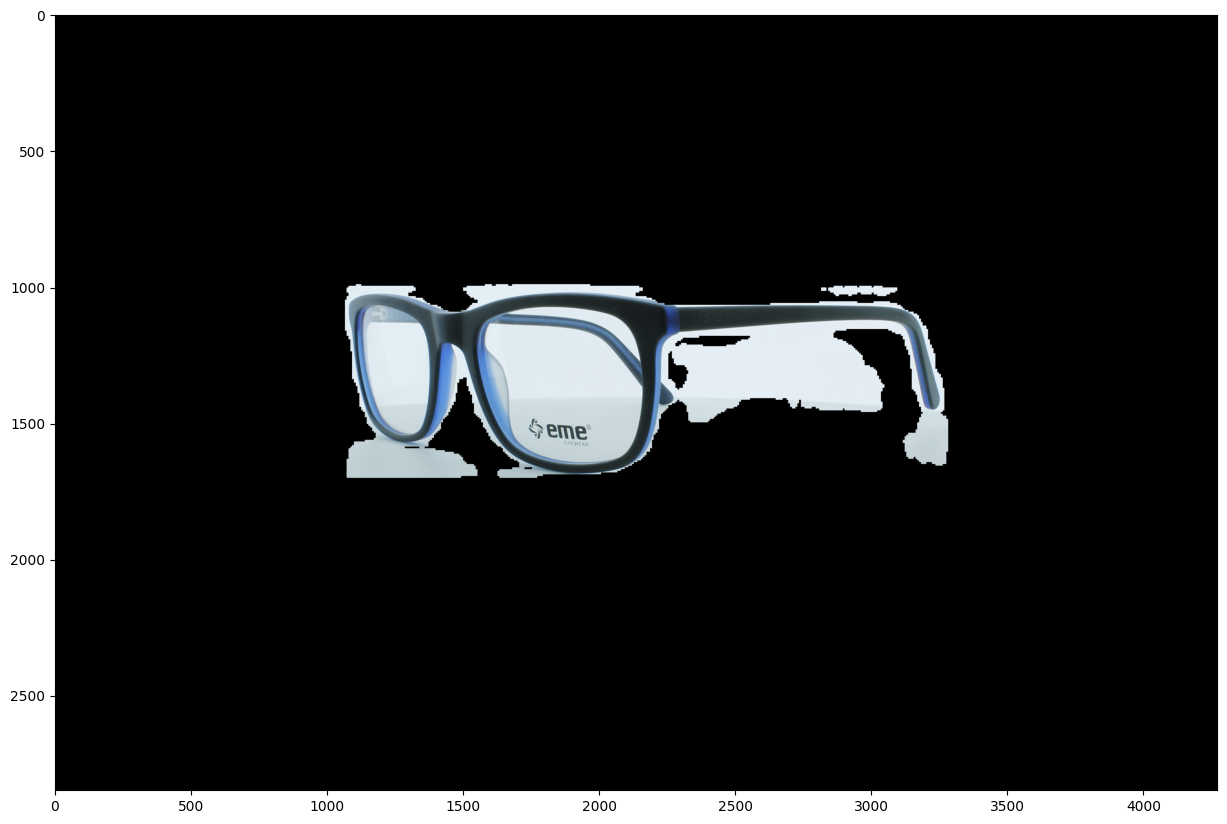

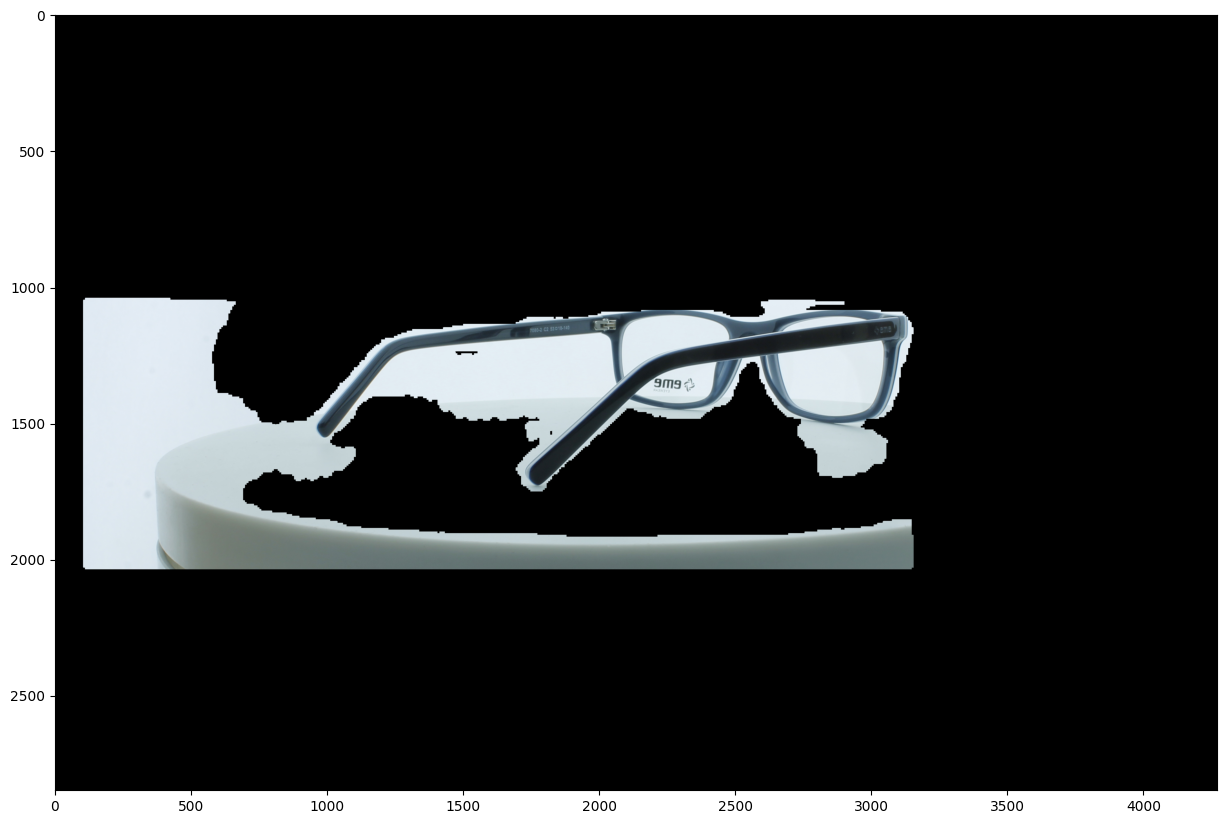

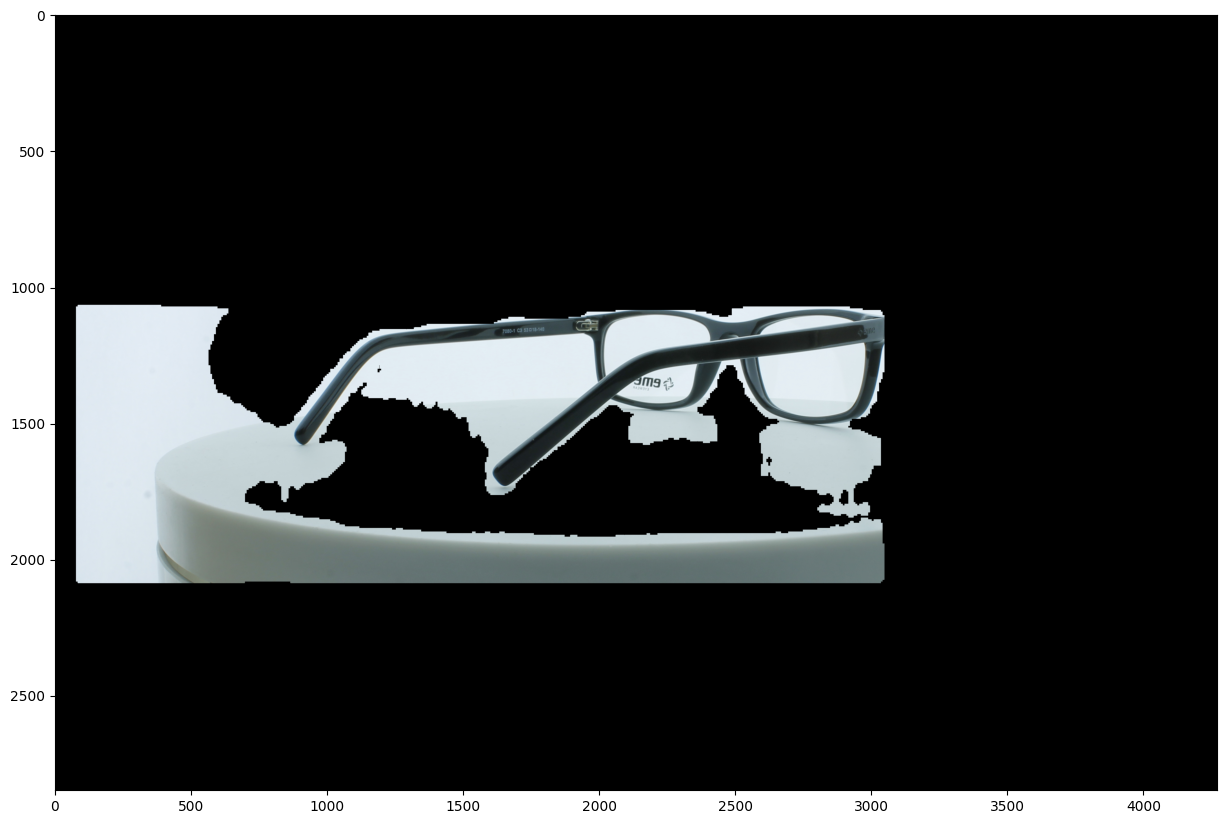

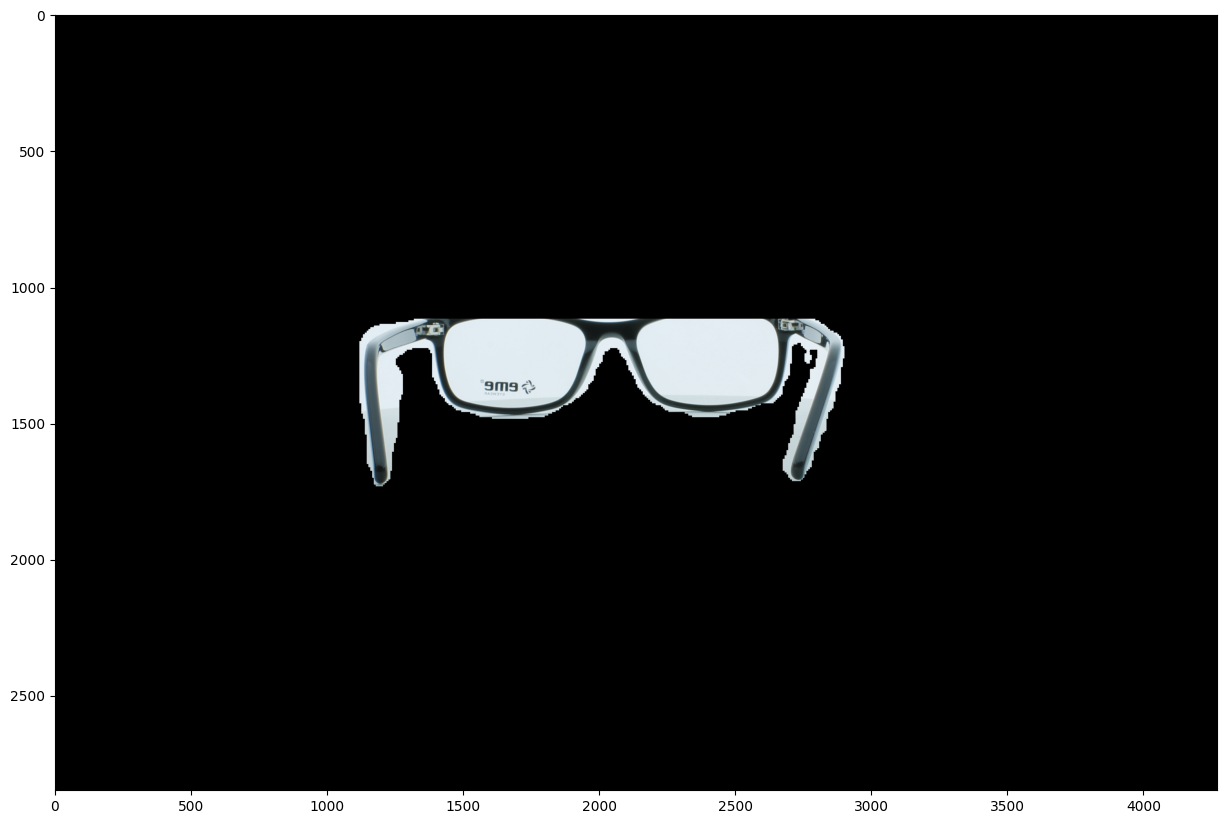

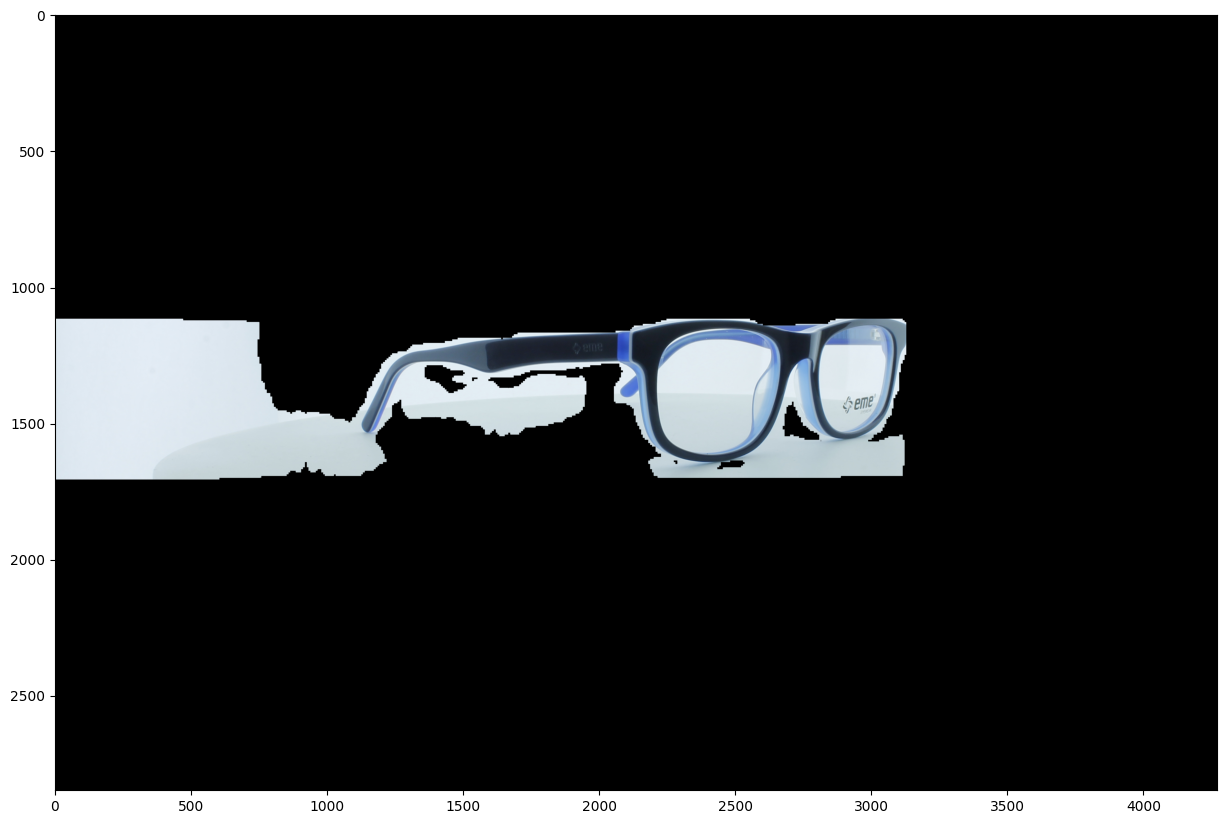

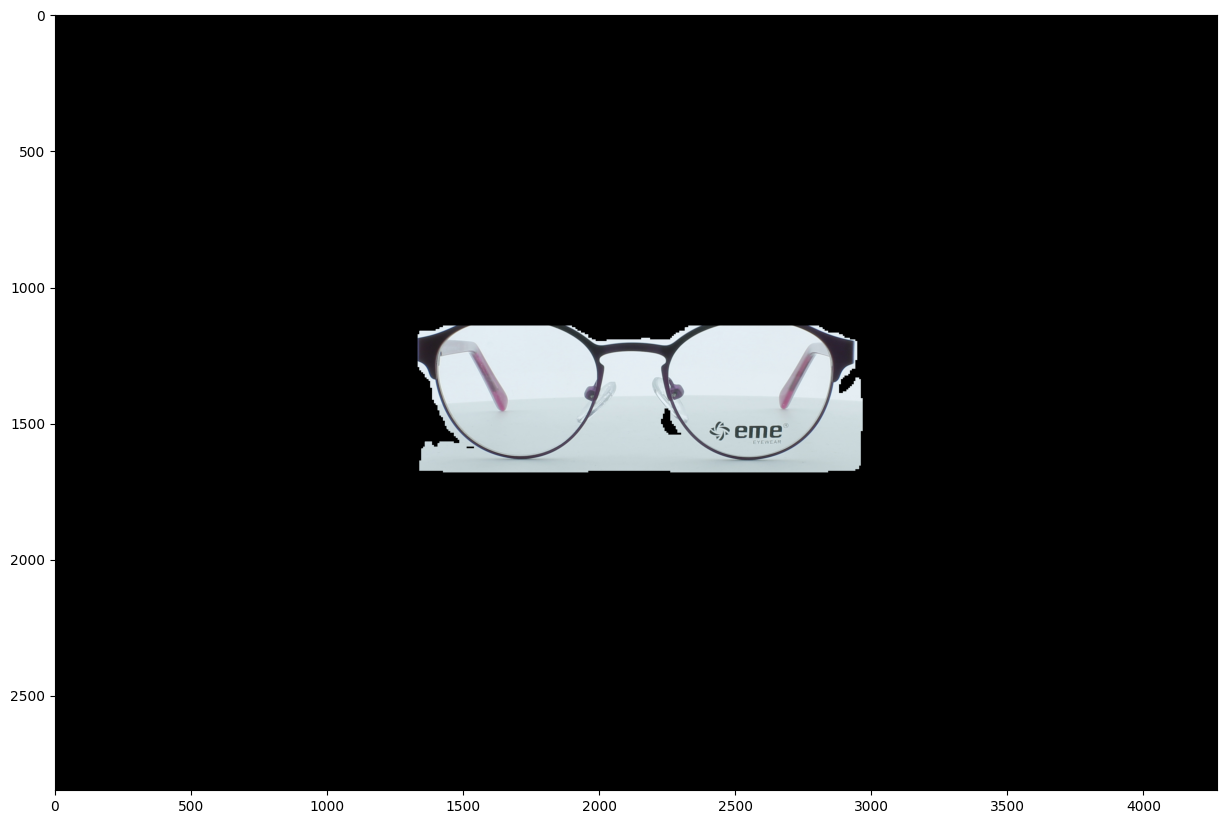

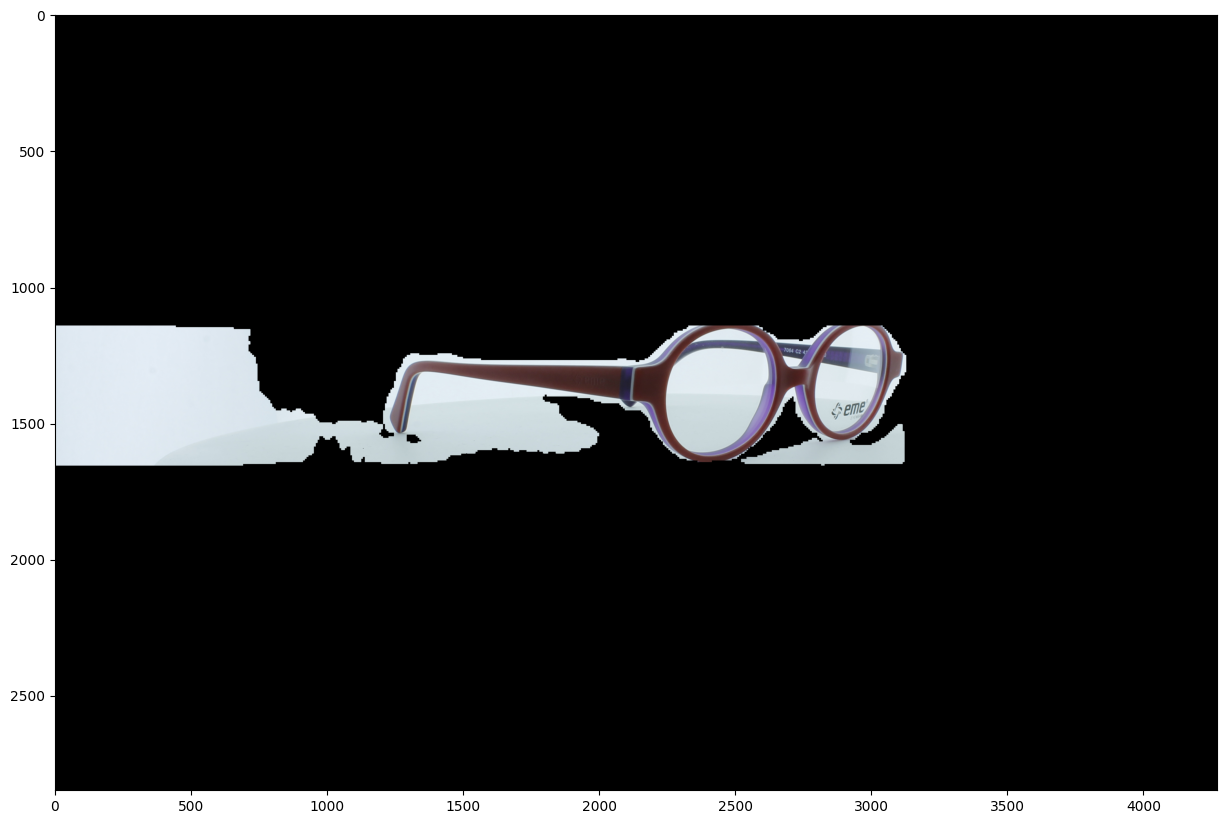

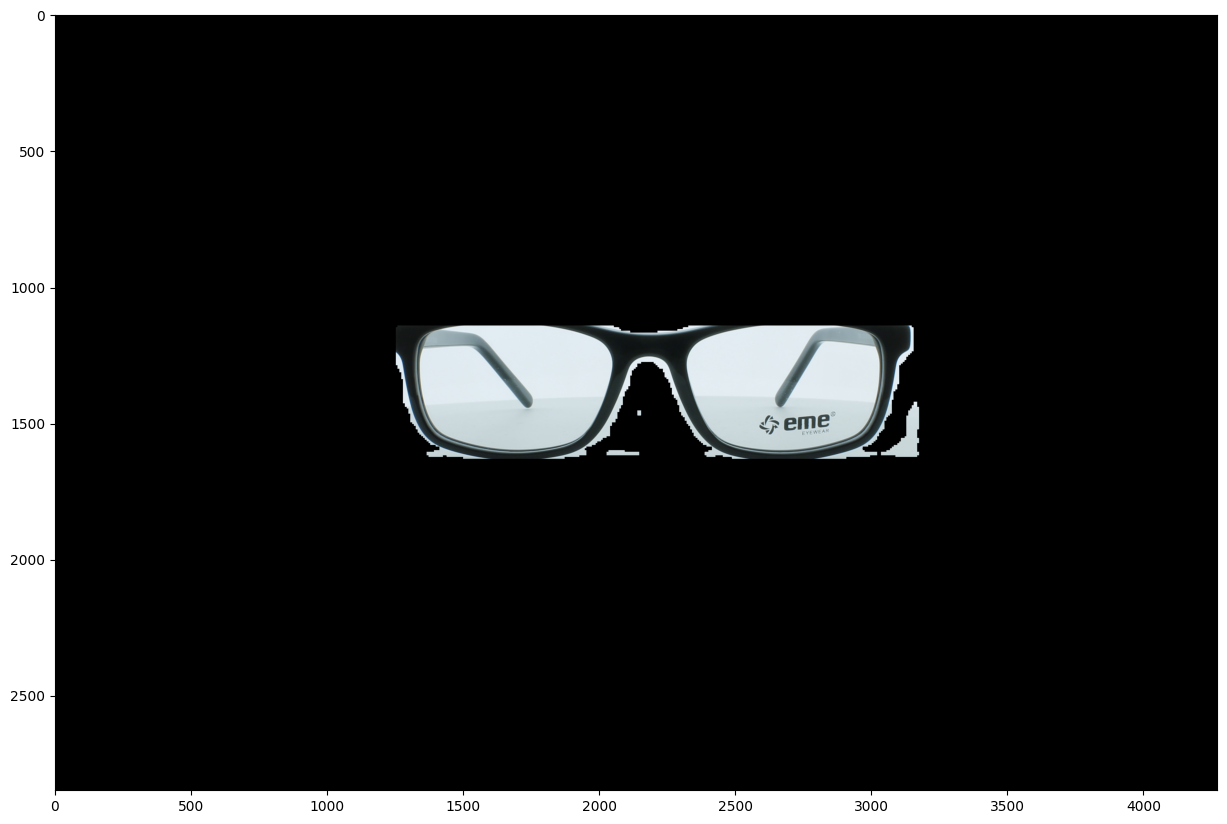

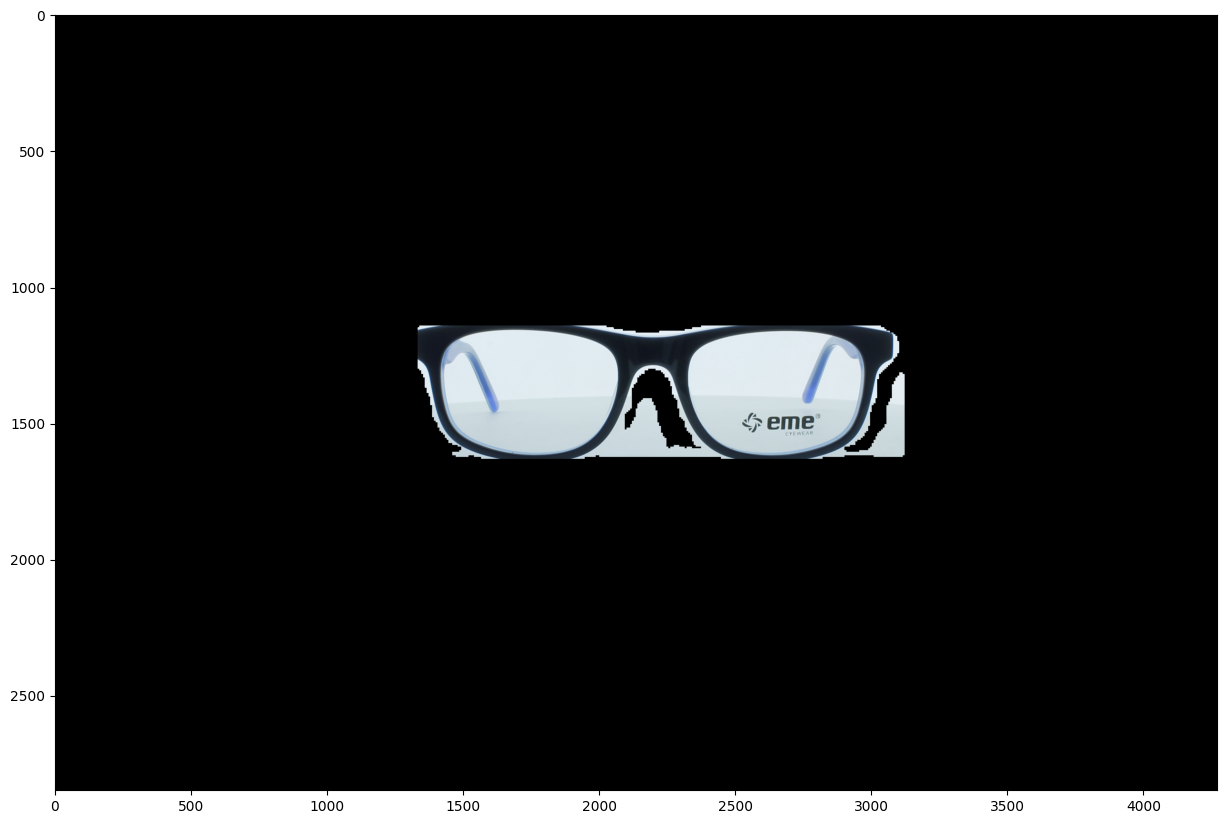

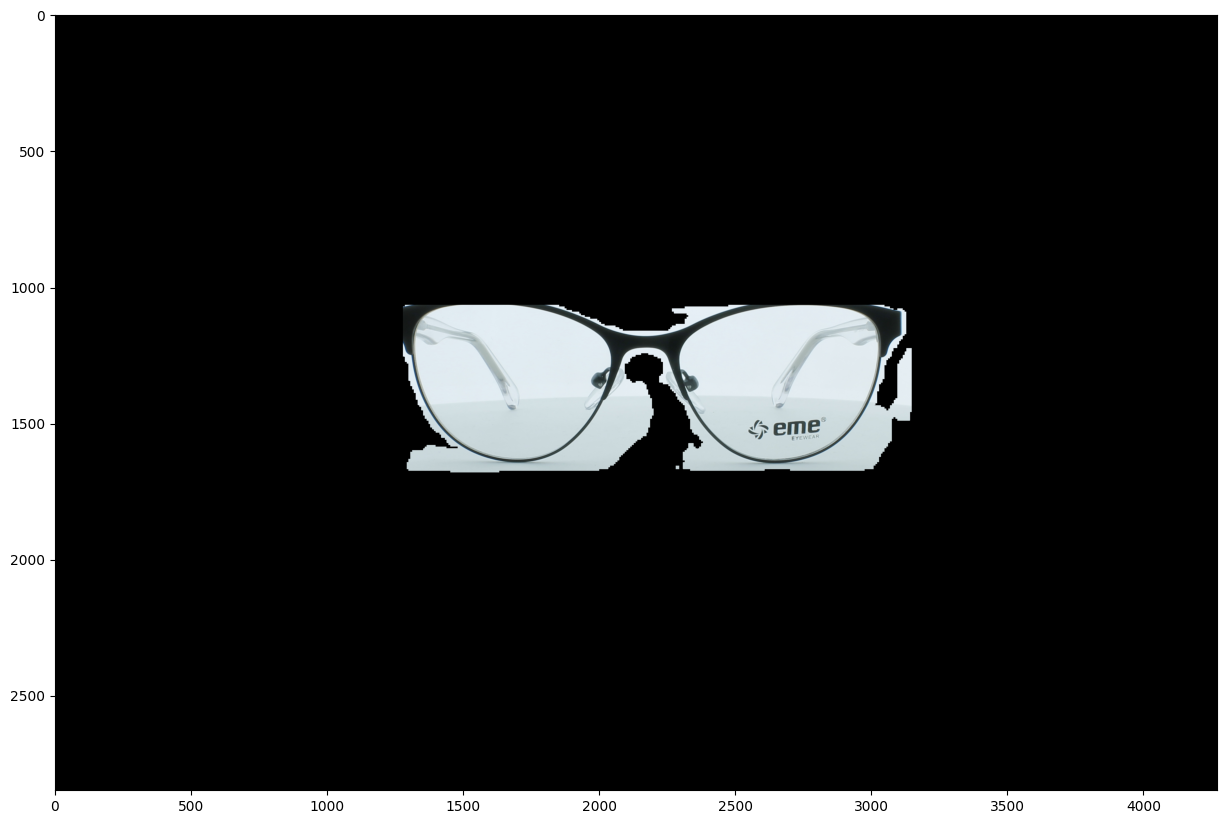

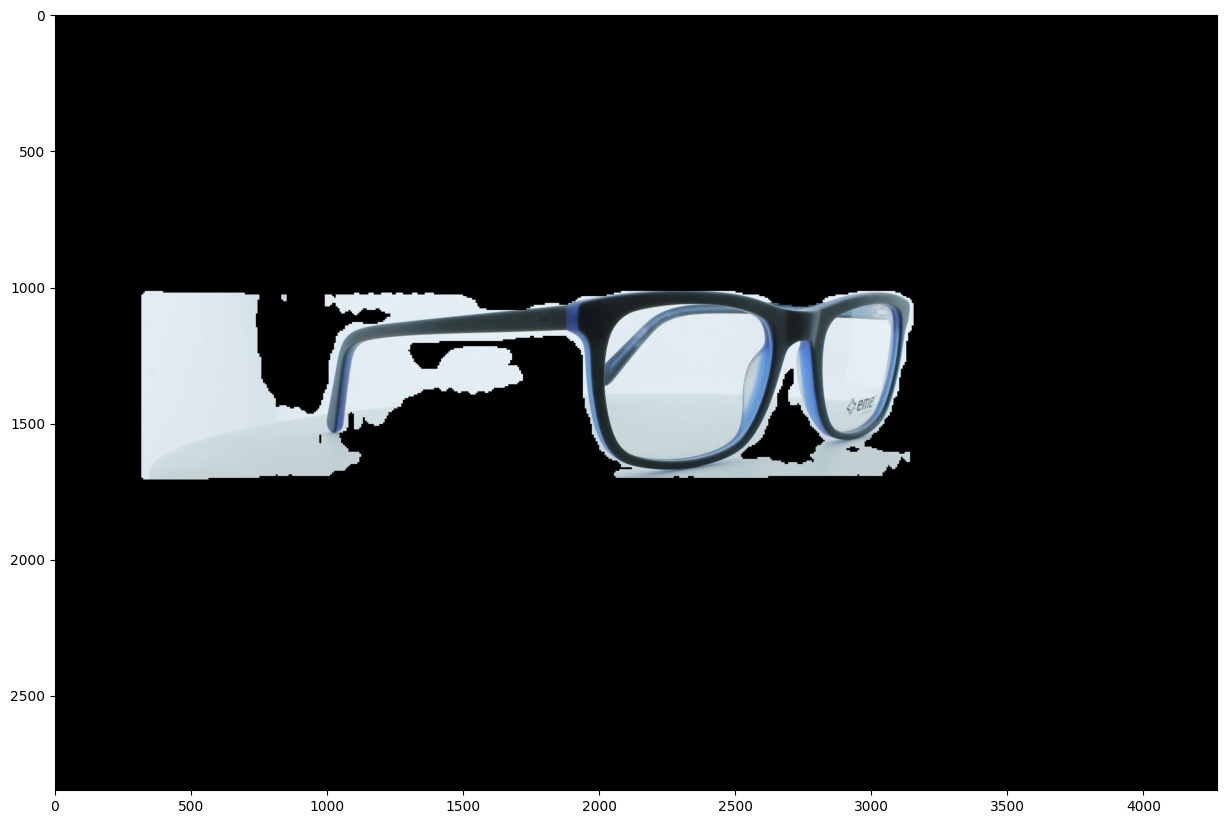

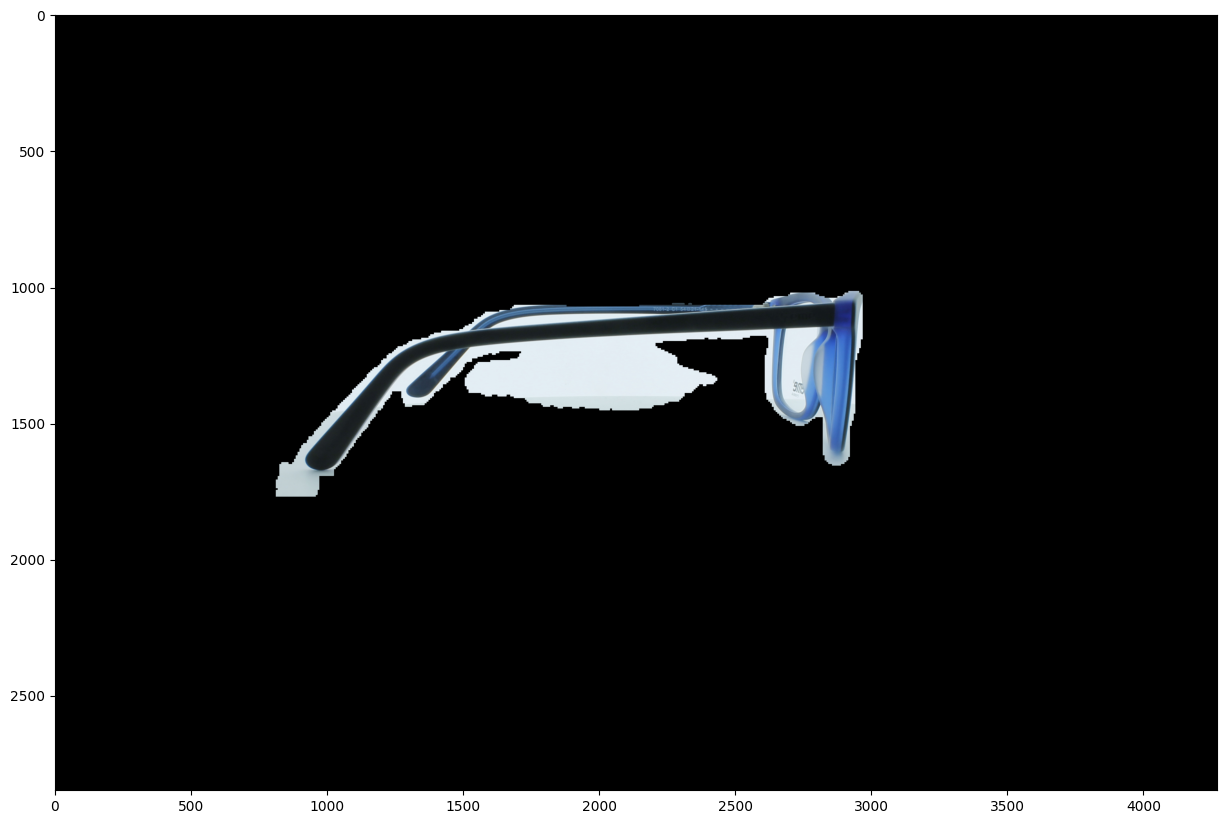

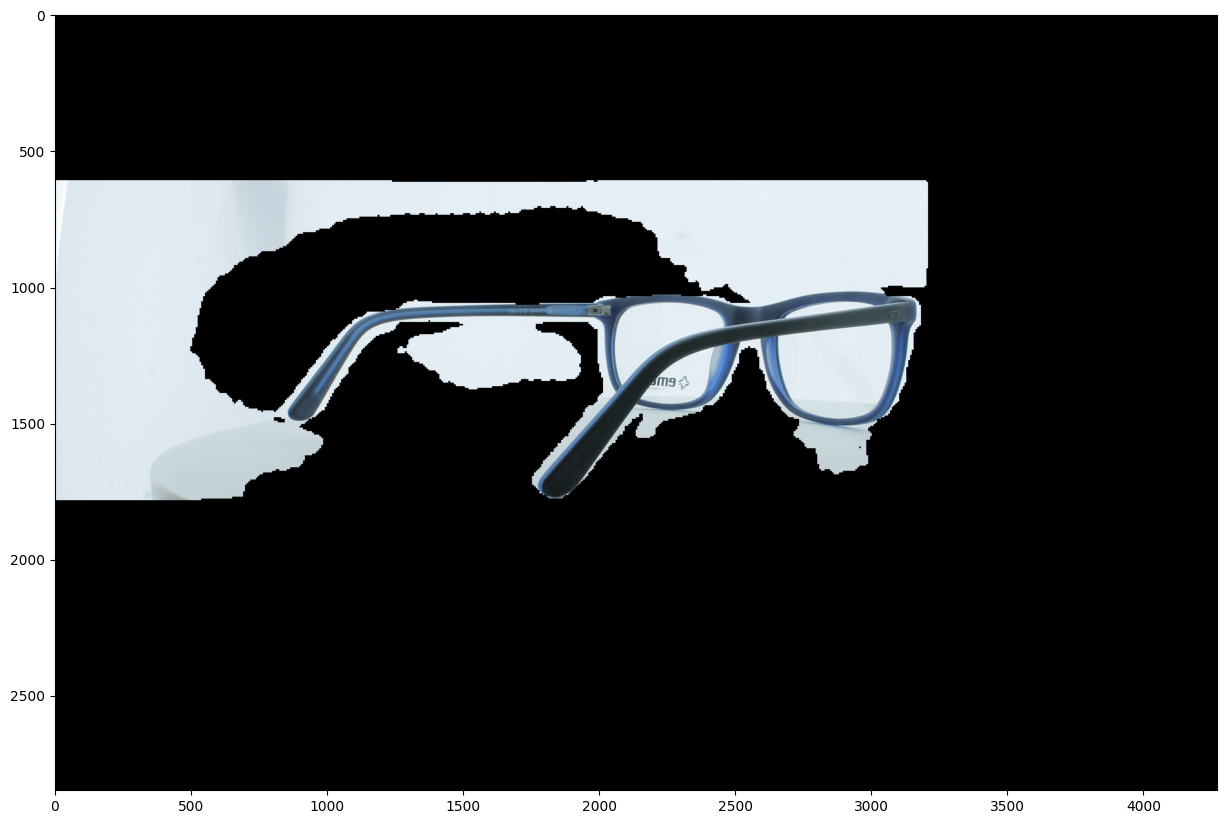

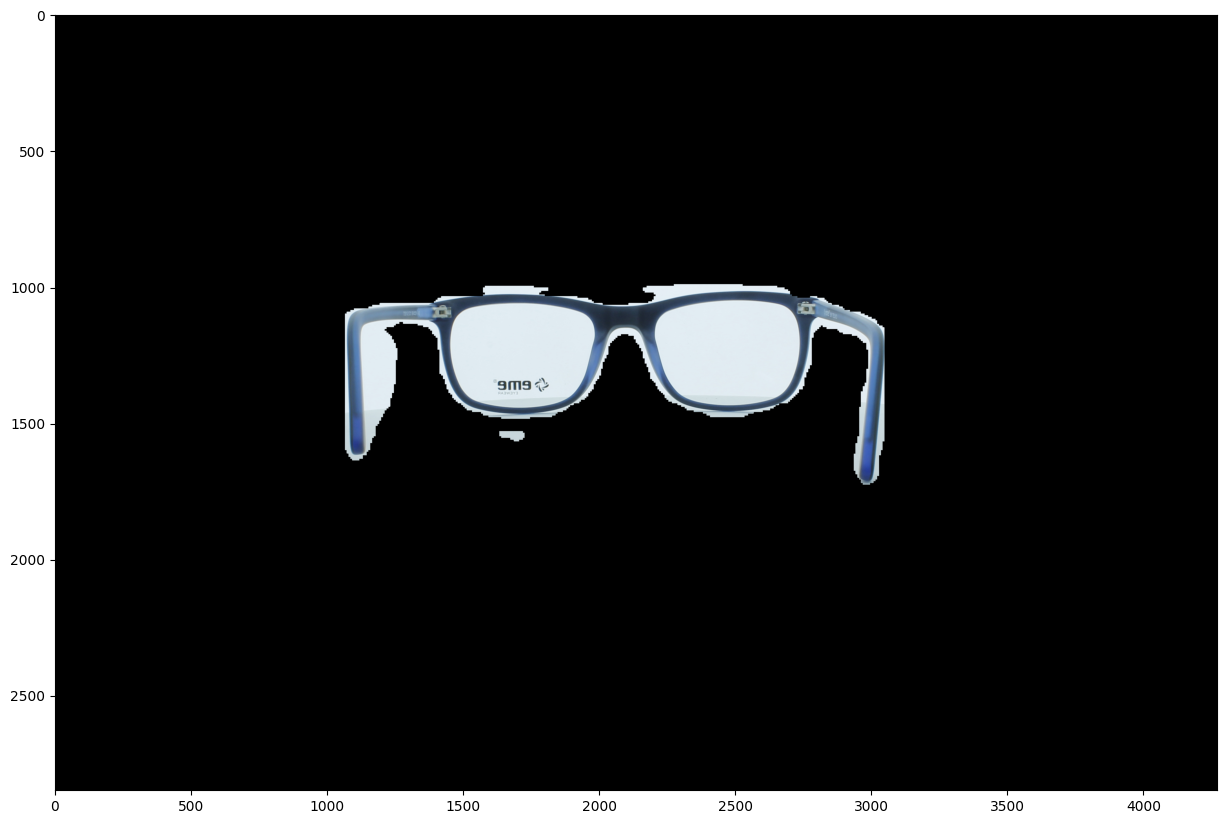

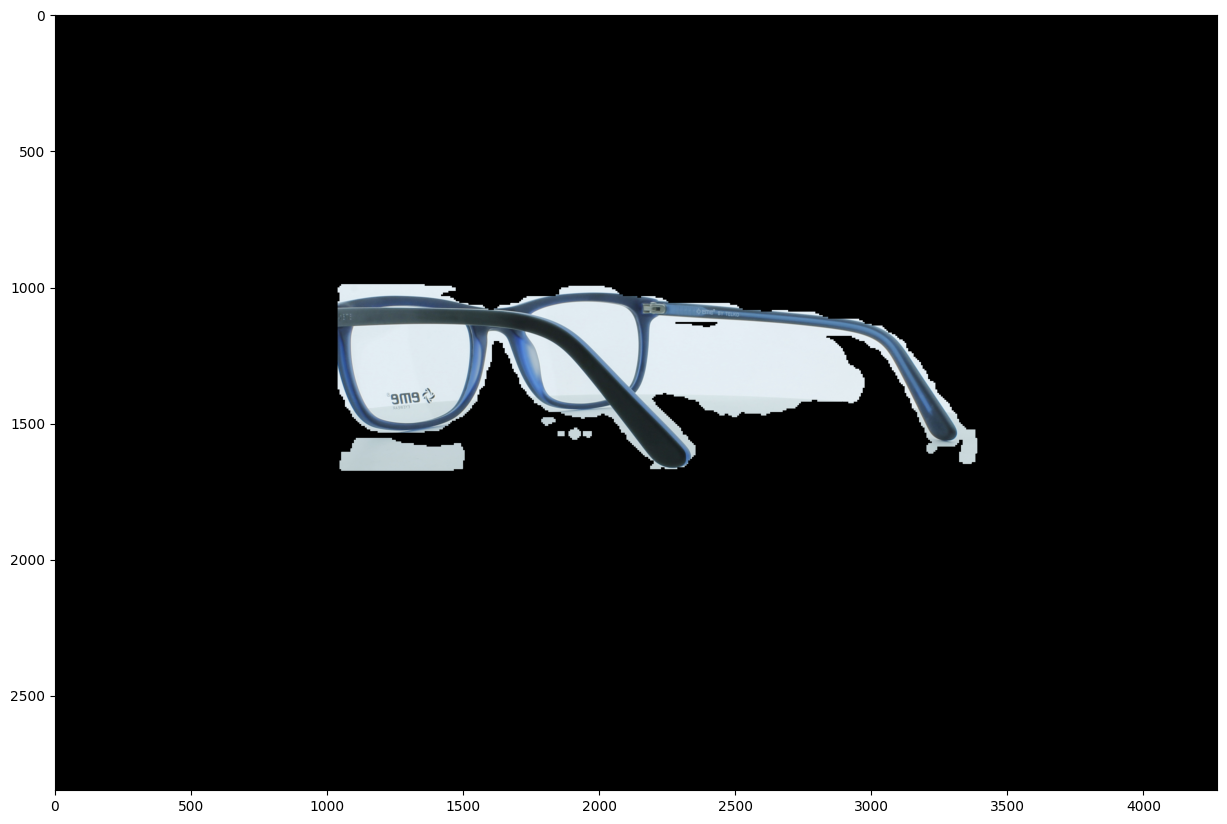

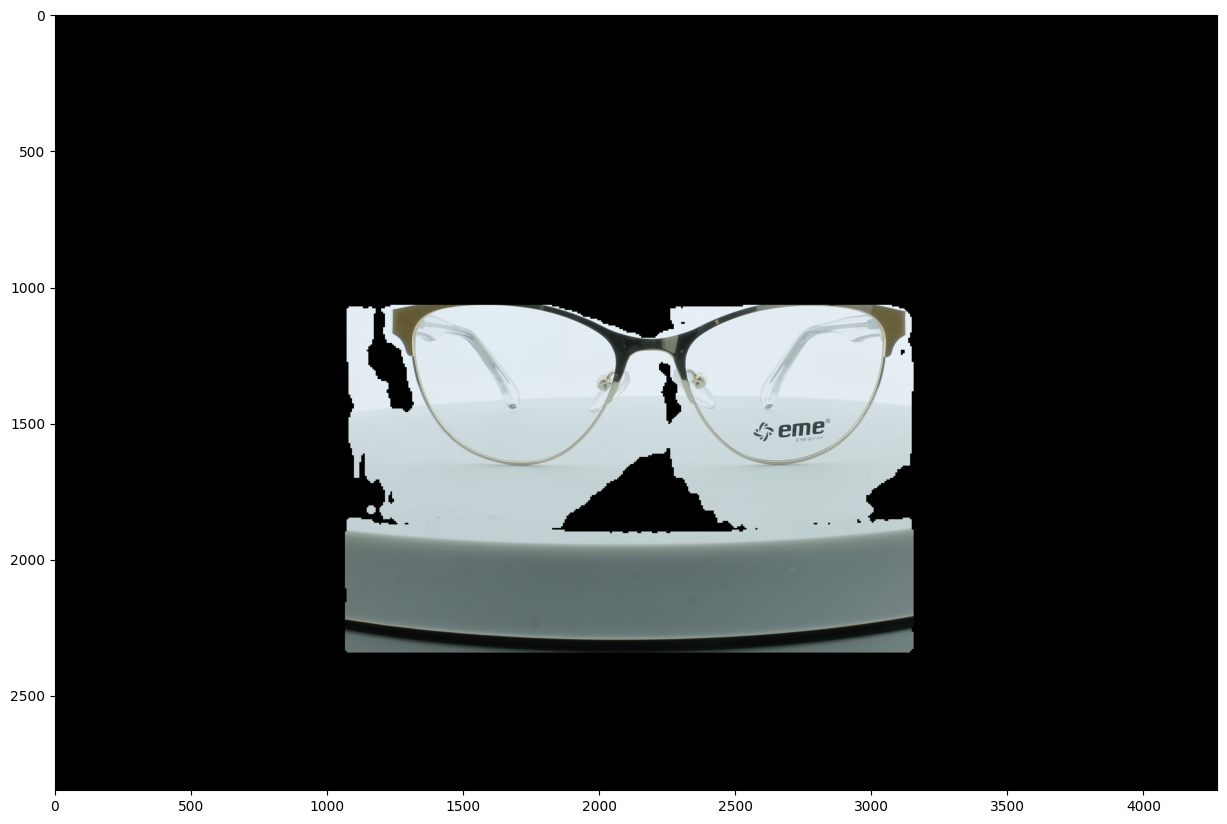

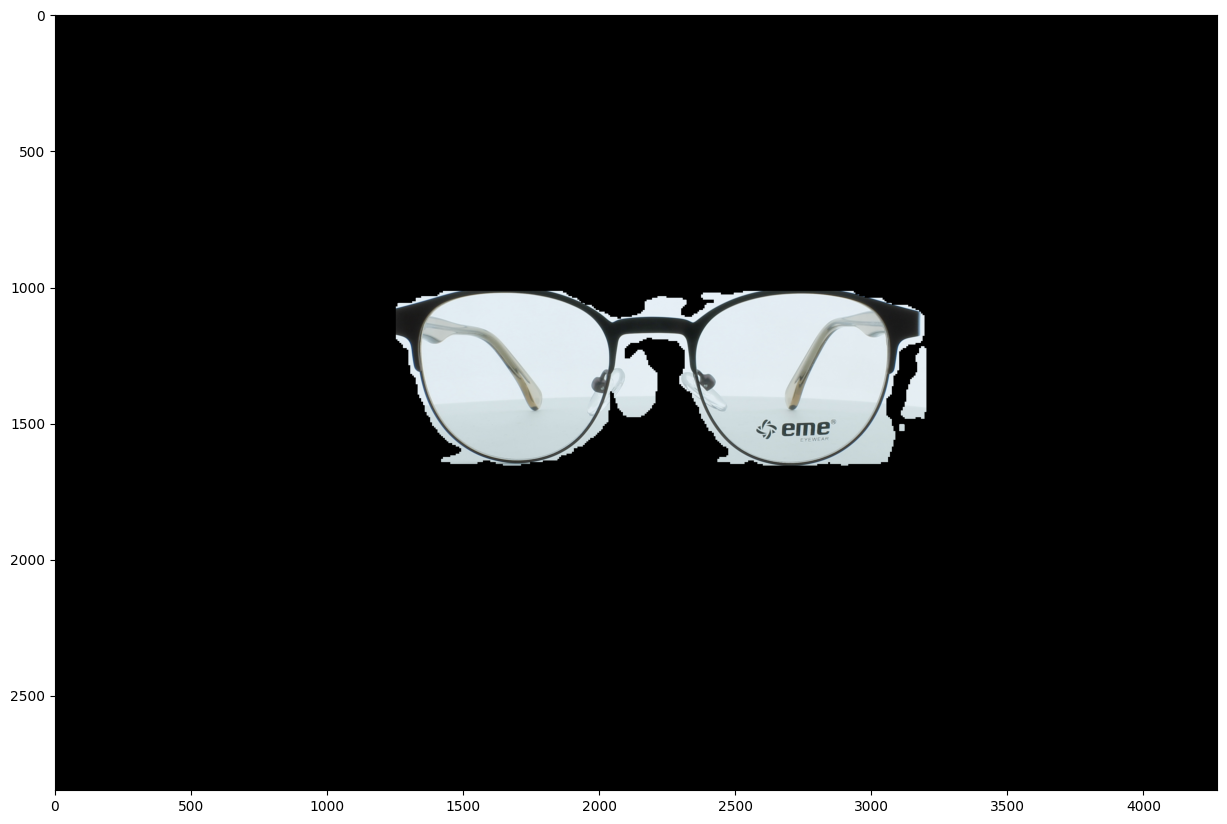

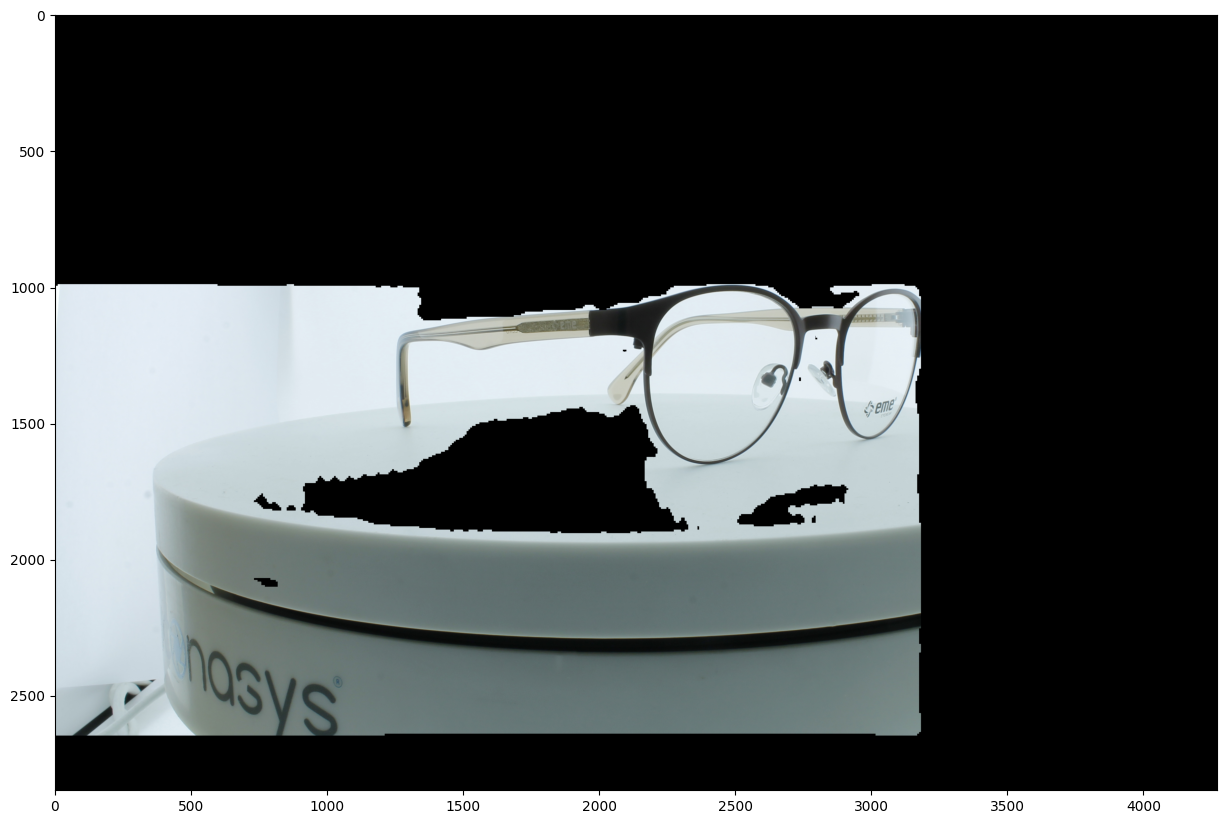

In [ ]:
from ultralytics import YOLO
import os
from tqdm import tqdm
import cv2

for i in tqdm(os.listdir("/content/drive/MyDrive/JPEG")):
  model_path = '/content/results-2/results-2/runs/segment/train/weights/best.pt'
  path_test = os.path.join("/content/drive/MyDrive/JPEG", i)

  image_path = path_test

  img = cv2.imread(image_path)
  H, W, _ = img.shape

  model = YOLO(model_path)
  try:
    results = model(img)

    for result in results:
      for j, mask in enumerate(result.masks.data):

          mask = mask.cpu().numpy() * 255

          mask = cv2.resize(mask, (W, H))

          cv2.imwrite('./output.png', mask)

    BGR = cv2.imread(path_test)
    mask1=cv2.imread("/content/output.png")
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.bitwise_and(BGR[:,:,::-1],BGR[:,:,::-1], mask=mask1[:,:,0]))
    plt.savefig(f'/content/cut_out{i}')
    #plt.show()

  except:
    continue



In [ ]:
for result in results:
    for j, mask in enumerate(result.masks.data):

        mask = mask.cpu().numpy() * 255

        mask = cv2.resize(mask, (W, H))

        cv2.imwrite('./output.png', mask)

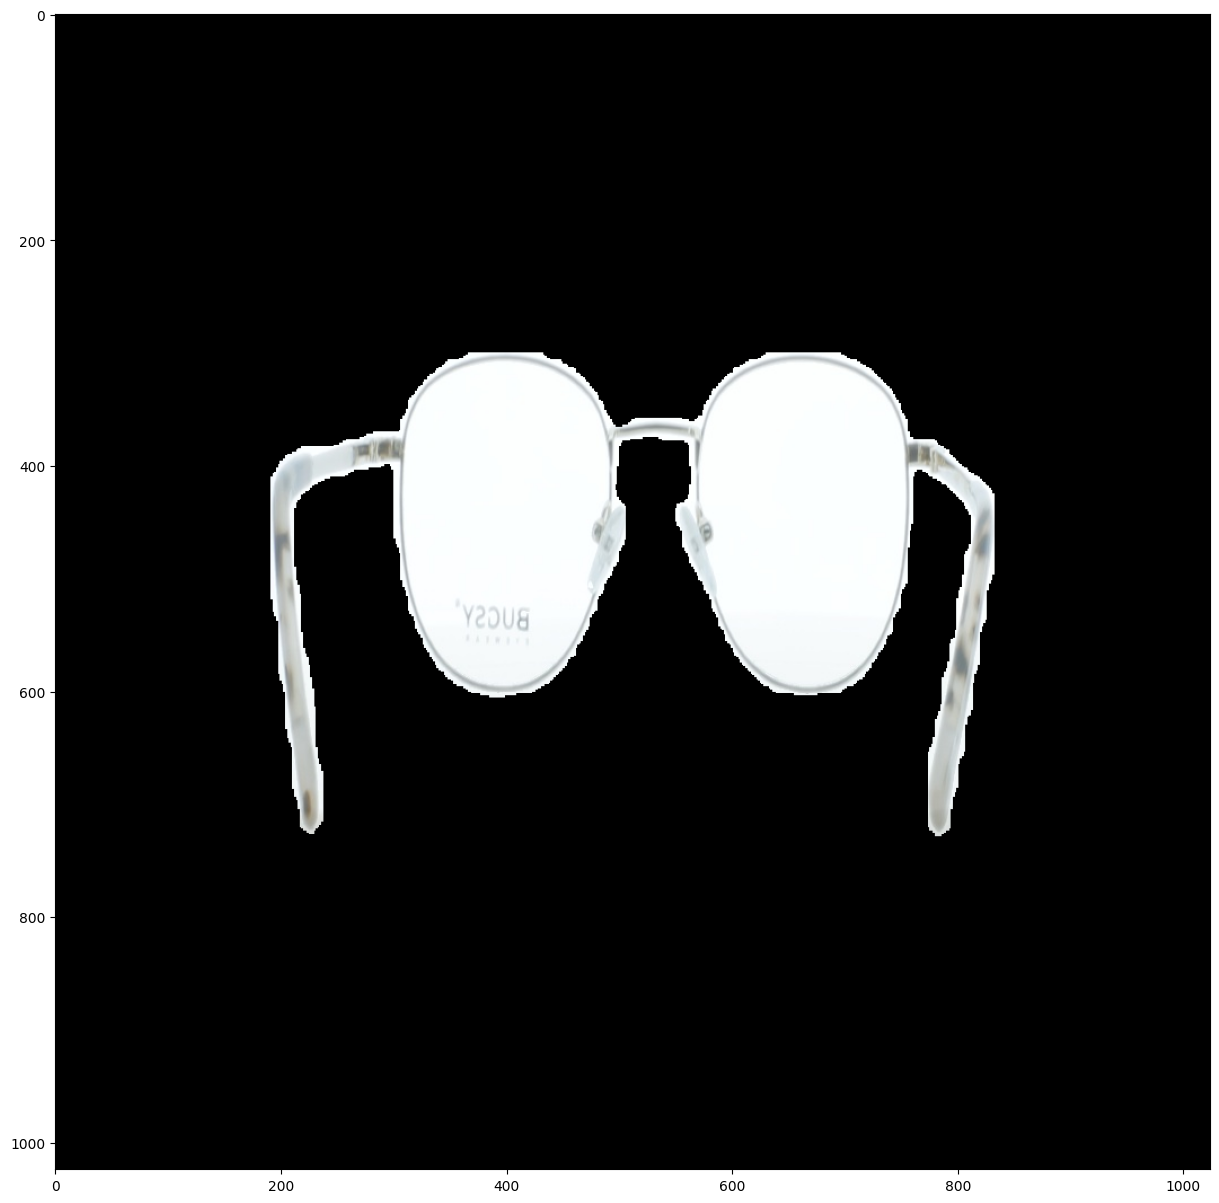

In [ ]:
BGR = cv2.imread('/content/content/data/images/val/B4141C1_img_05.jpeg')
mask1=cv2.imread("/content/output.png")
plt.figure(figsize=(15,15))
# plt.imshow(BGR[:,:,::-1],cmap='hsv')
# plt.show()
plt.imshow(cv2.bitwise_and(BGR[:,:,::-1],BGR[:,:,::-1], mask=mask1[:,:,0]))
# plt.show()
plt.savefig('foo.png')